# [Multi-Class Prediction of Obesity Risk](https://www.kaggle.com/competitions/playground-series-s4e2)
### Playground Series - Season 4, Episode 2

_______________________________________________________________________ 
# Author Details:
- Name: Najeeb Haider Zaidi
- Email: zaidi.nh@gmail.com
- Profiles: [Github](https://github.com/snajeebz)  [LinkedIn](https://www.linkedin.com/in/najeebz) [Kaggle](https://www.kaggle.com/najeebz)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:


[Walter Reade, Ashley Chow. (2024). Multi-Class Prediction of Obesity Risk. Kaggle.](https://www.kaggle.com/competitions/playground-series-s4e2)
________________________________________________________________________
​
This Notebook is to be submitted to the competition so aims to start the process from the beginning to the creation of the submission csv file in proper format.
__________________________________________________________________________
# Code Execution and Versioning Repository: 
- [Execute the notebook in Kaggle](https://www.kaggle.com/najeebz/multi-class-classification-obesity-risk-eda)
- [Github Repository](https://github.com/snajeebz/playground)
​
____________________________________________________________________
# Citation:

Najeeb Zaidi. (2024). Multi-Class Prediction of Obesity Risk. Competition Submission. Kaggle. https://www.kaggle.com/najeebz/multi-class-classification-obesity-risk-eda

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from warnings import filterwarnings;
filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')


In [3]:
df.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [4]:
test.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [5]:
df.isnull().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
test.isnull().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [7]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Dataset Description:

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note: This dataset is particularly well suited for visualizations, clustering, and general EDA.

Files
train.csv - the training dataset; NObeyesdad is the categorical target
test.csv - the test dataset; your objective is to predict the class of NObeyesdad for each row
sample_submission.csv - a sample submission file in the correct format

# Visualization

In [8]:
cat_cols=df[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']]
num_cols=df[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]


## Categorical Data Value Counts Plots

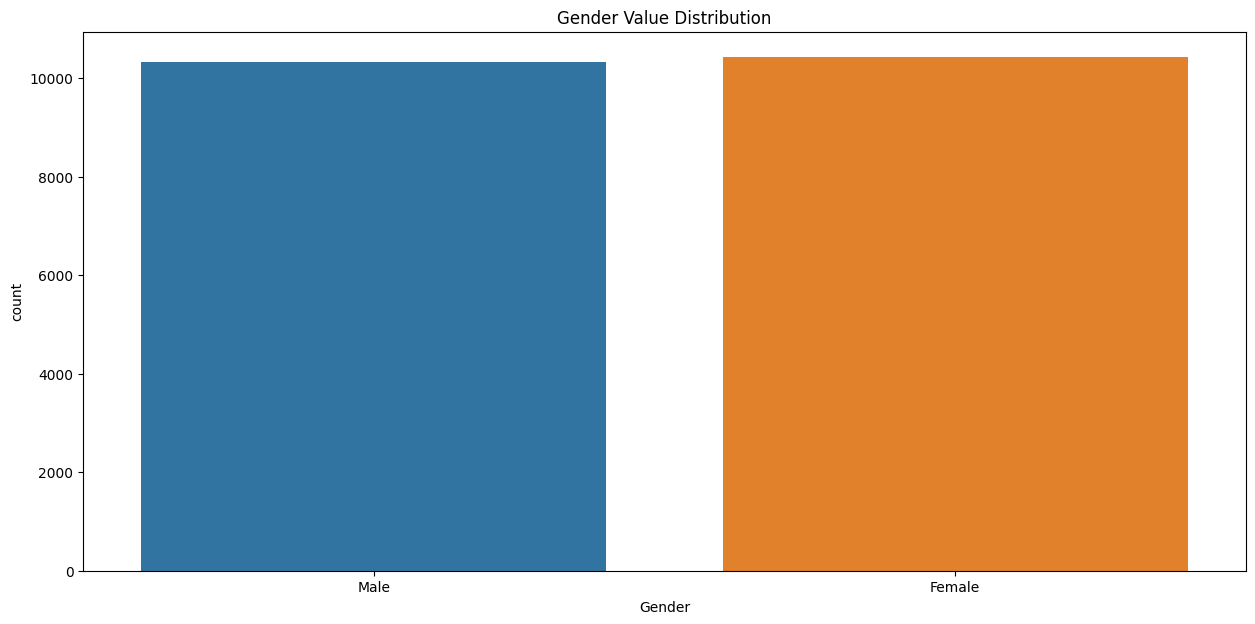

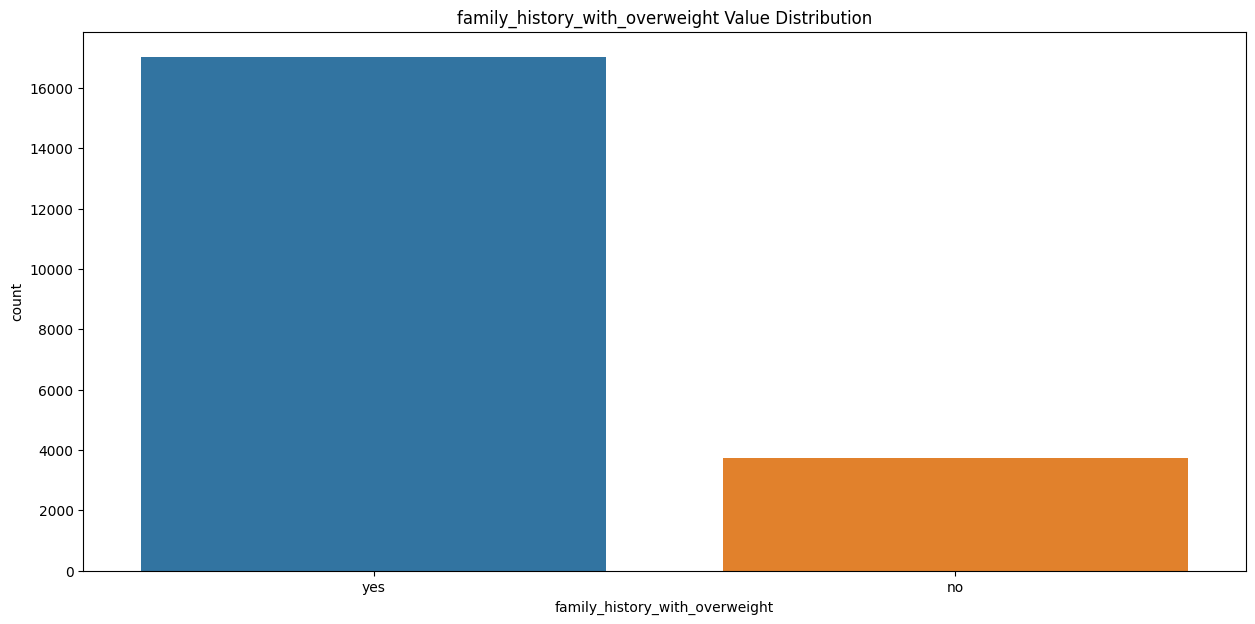

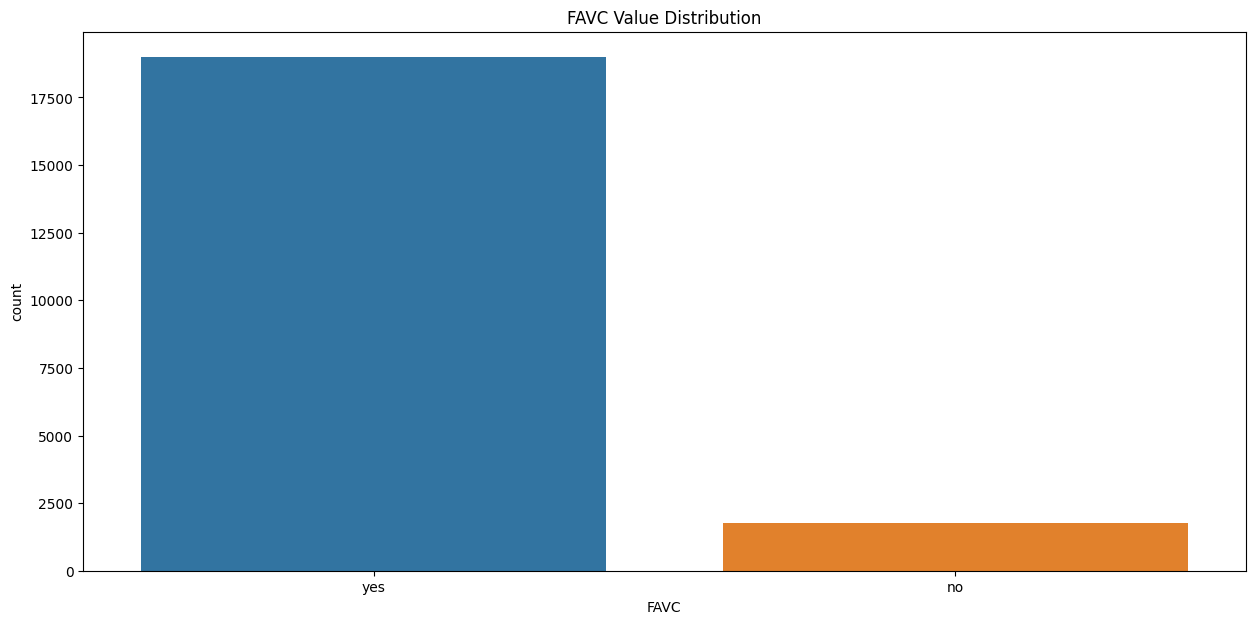

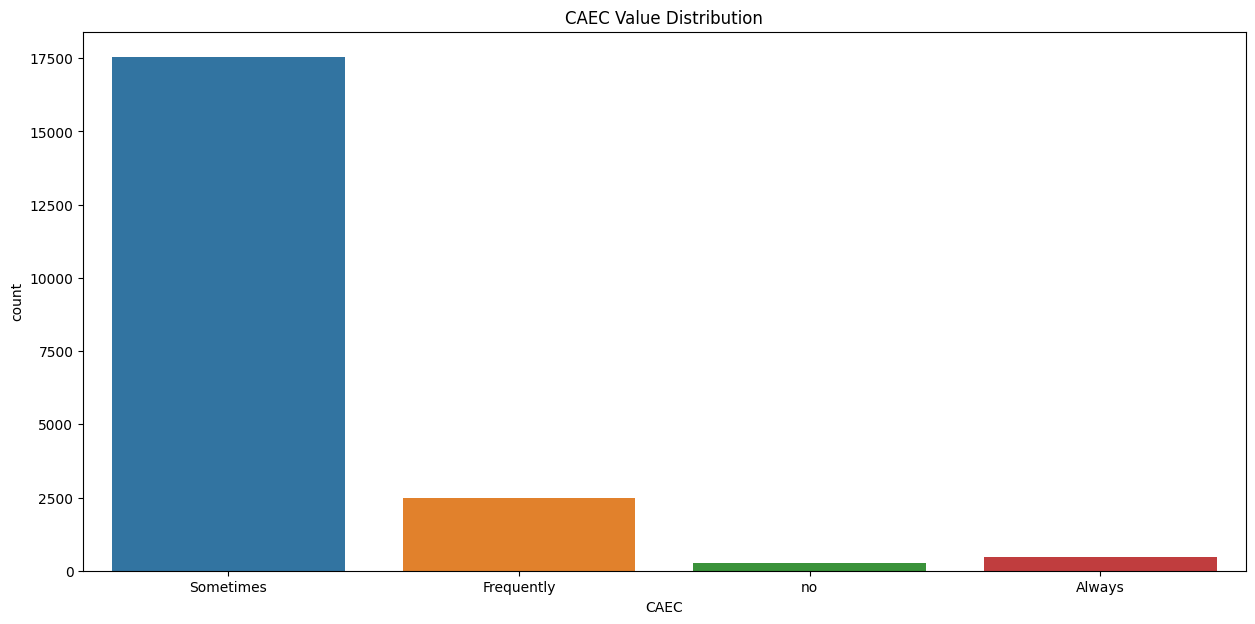

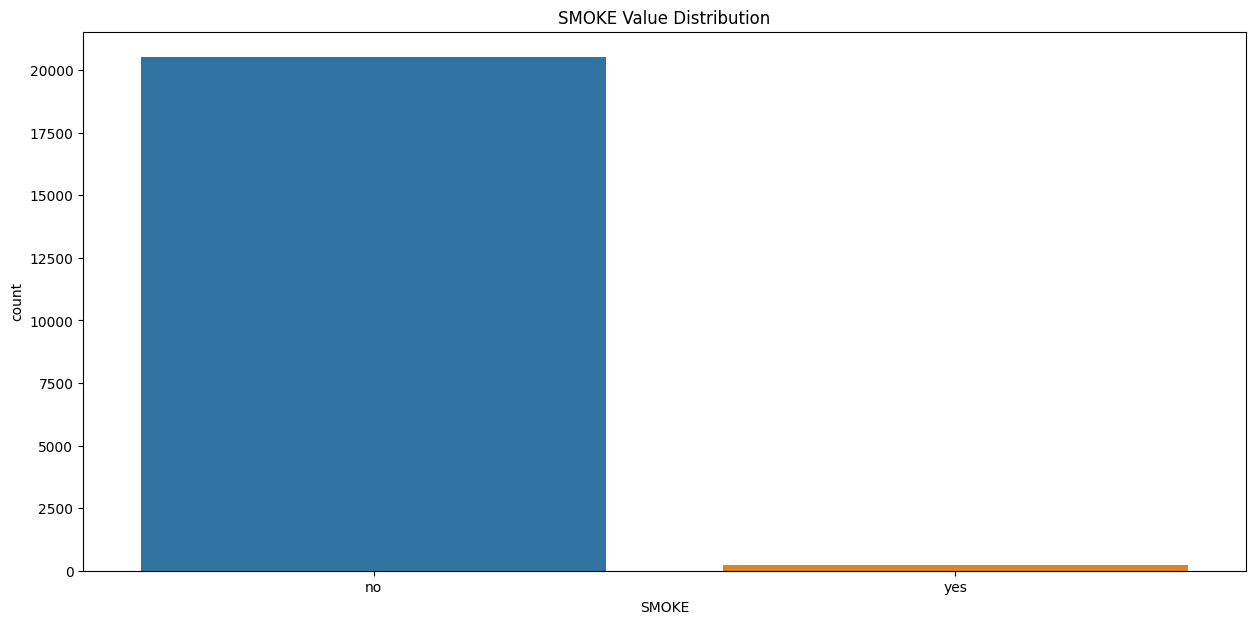

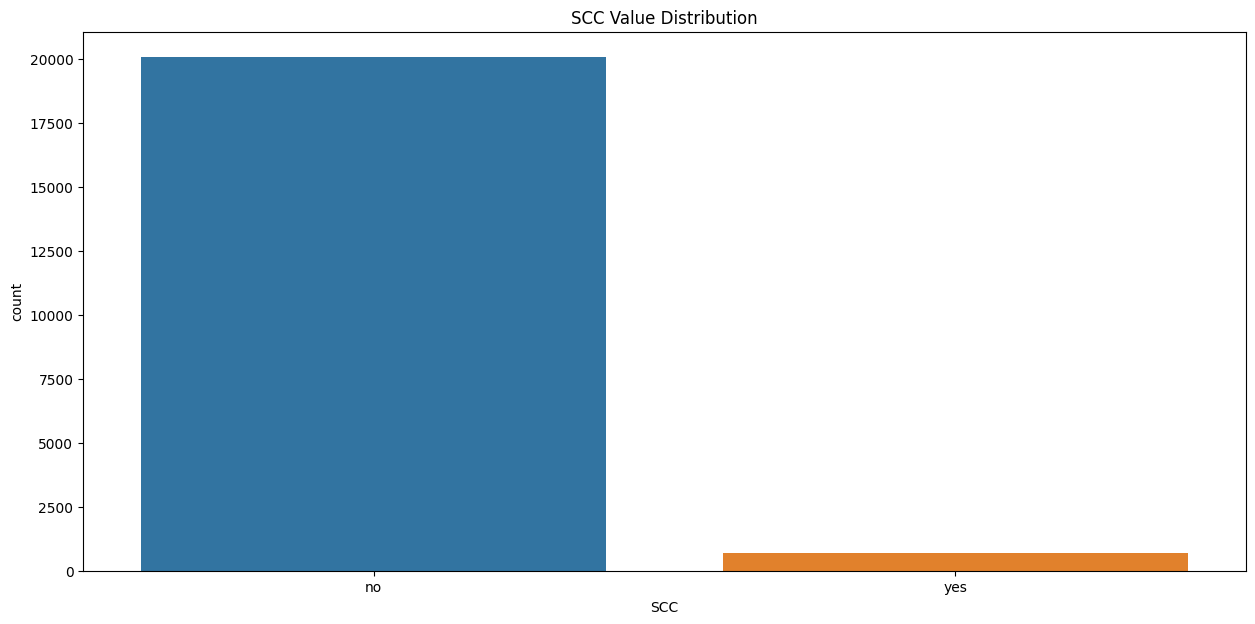

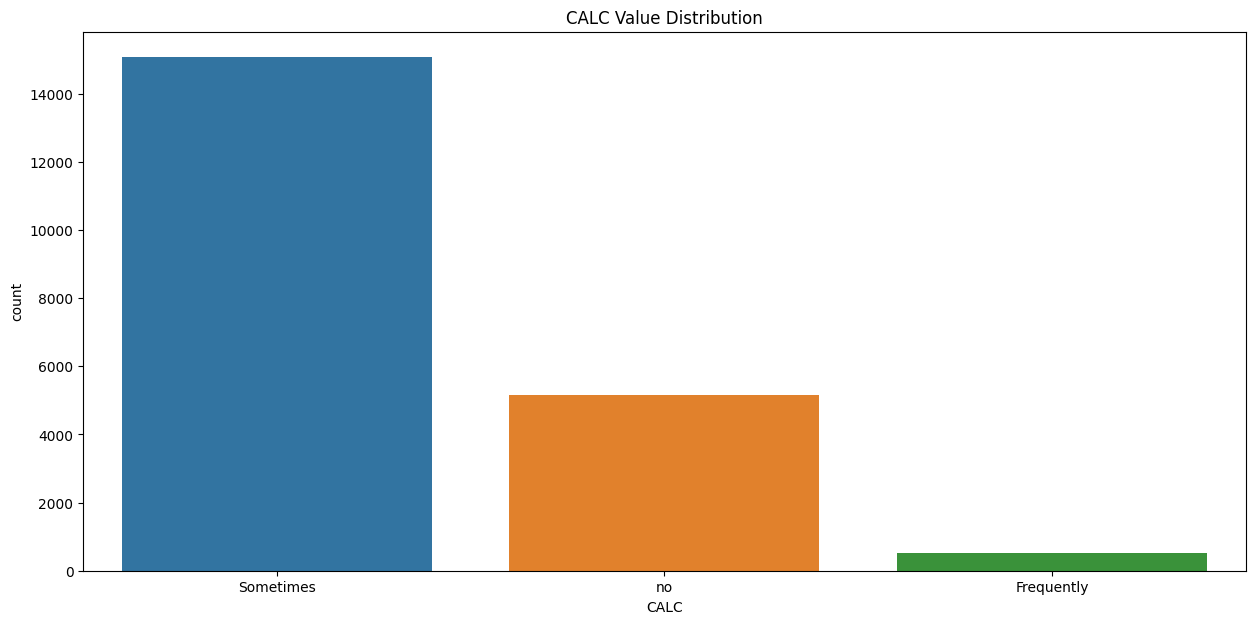

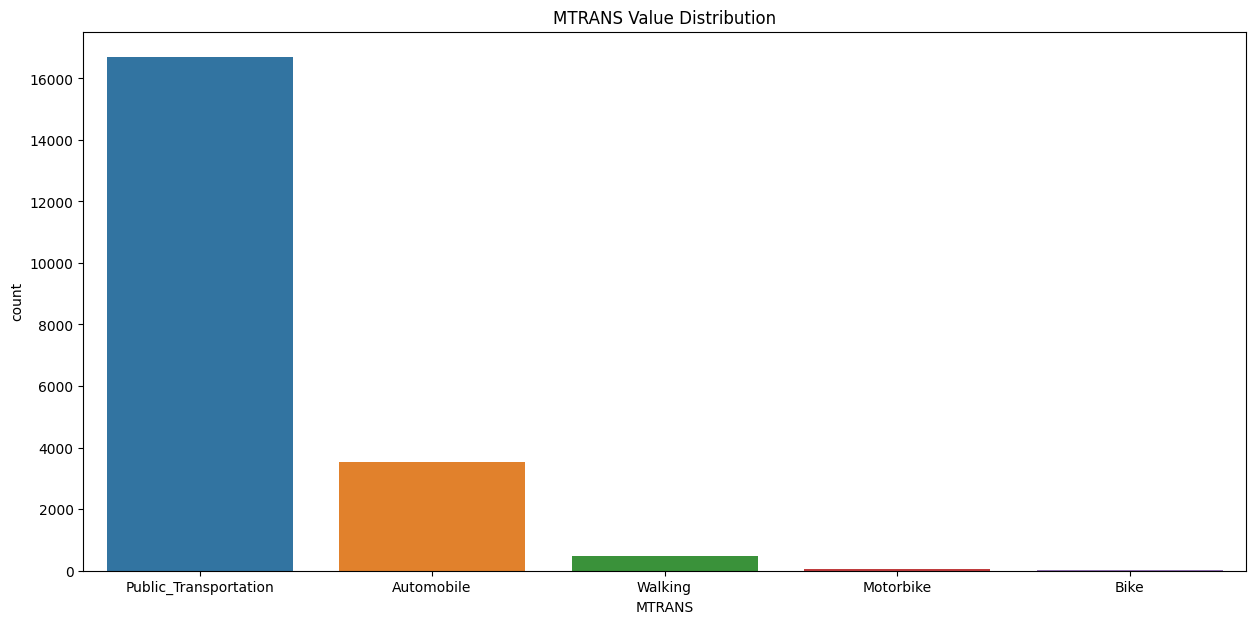

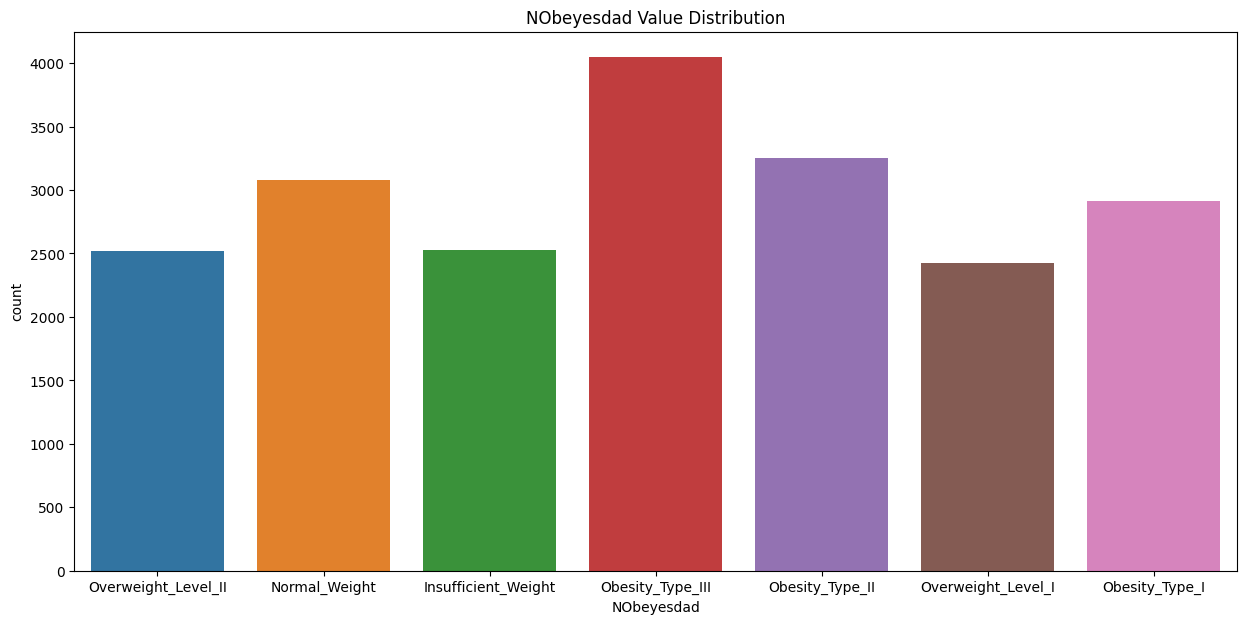

In [9]:
for col in cat_cols:
    plt.figure(figsize=[15,7])
    sns.countplot(df,x=df[col]).set(title= col+' Value Distribution')
    plt.show()

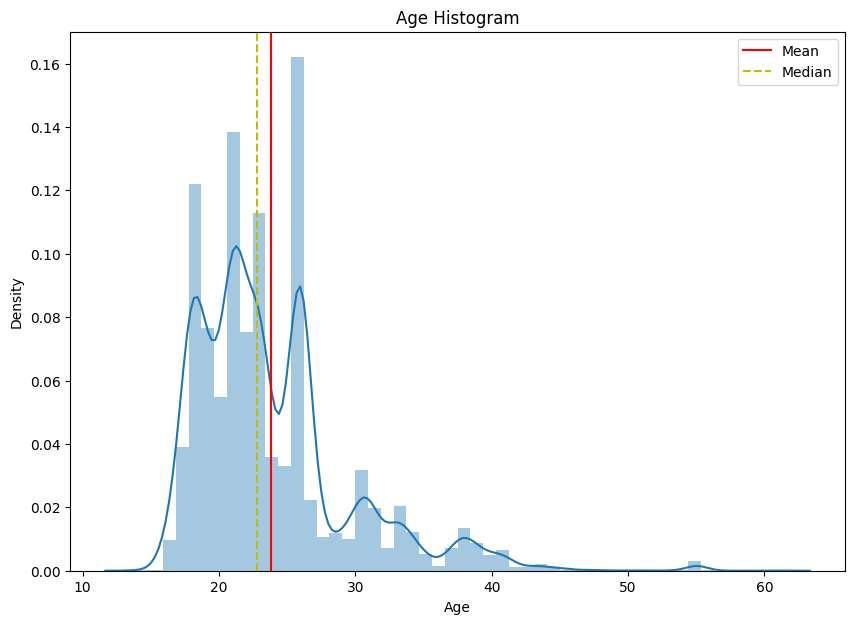

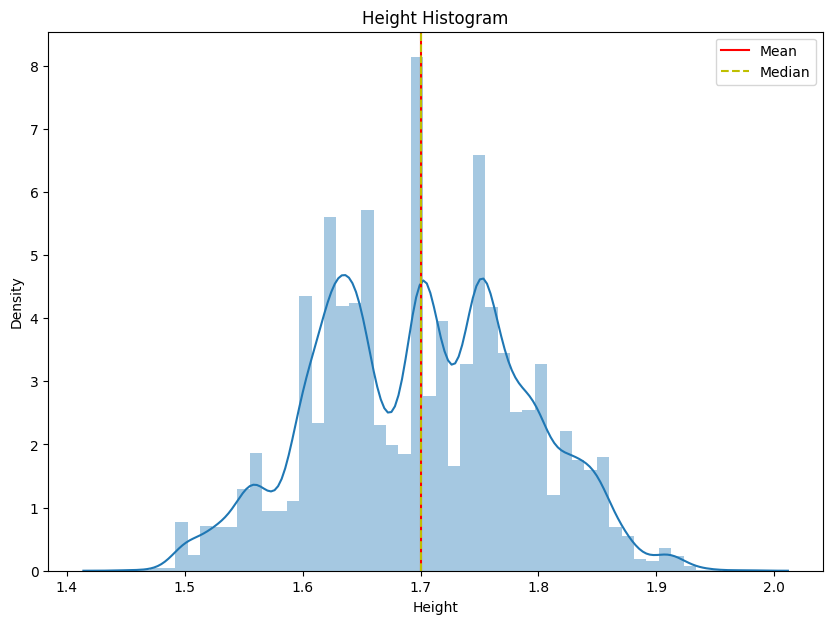

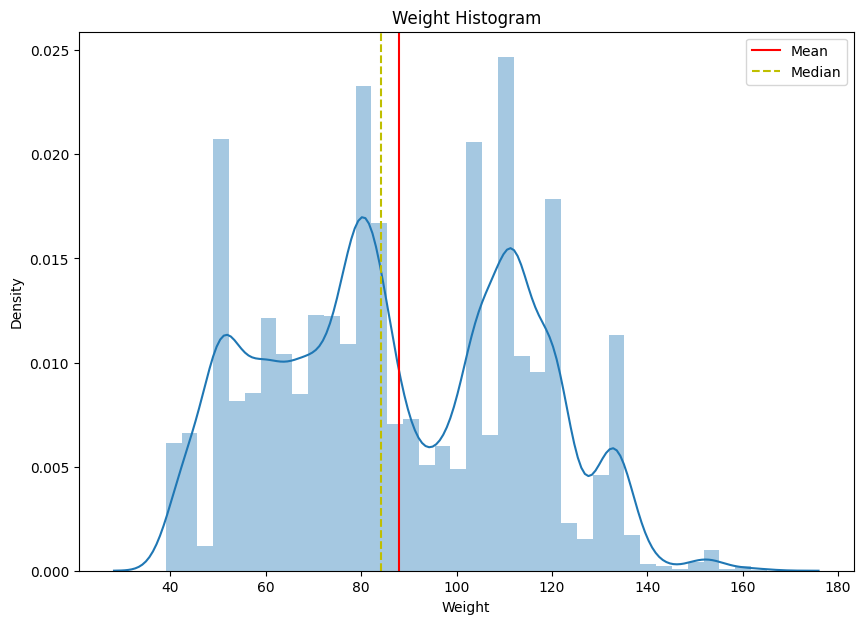

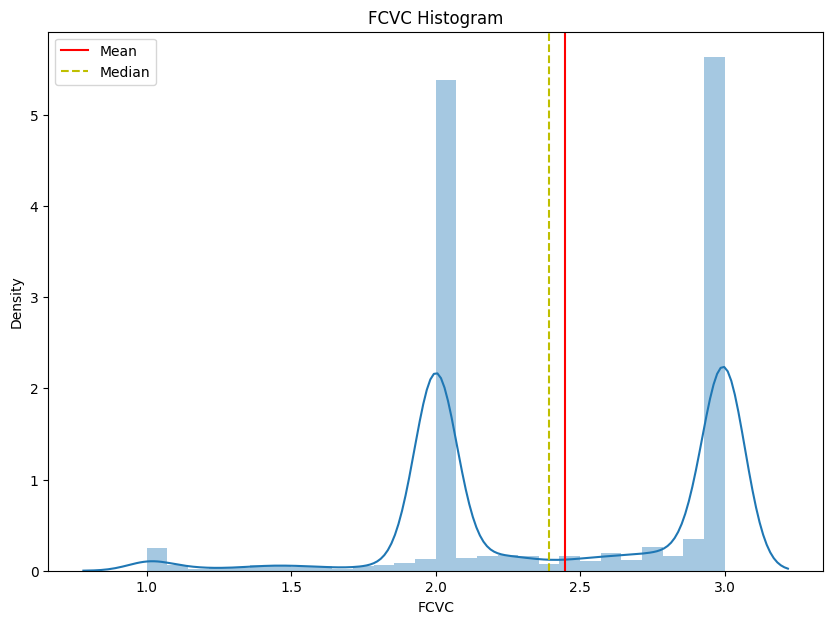

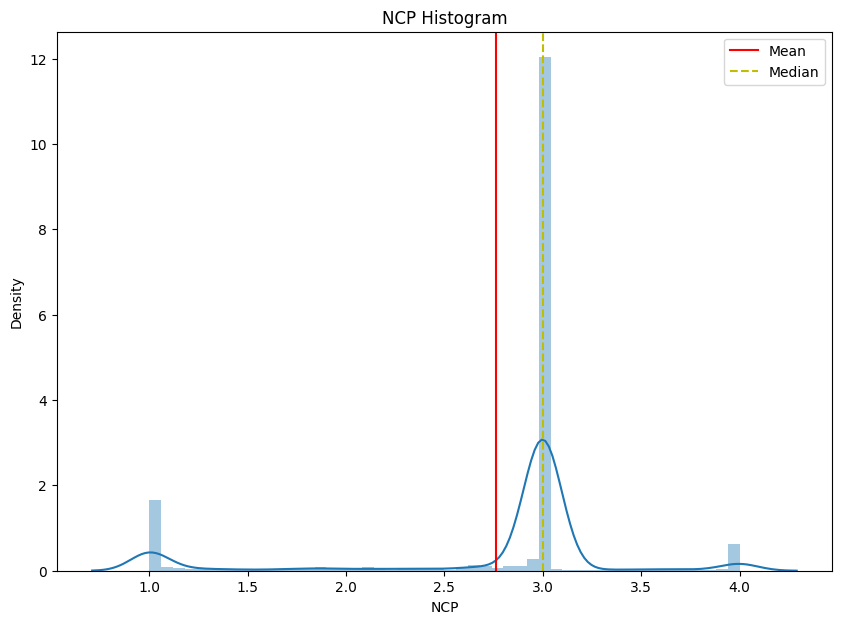

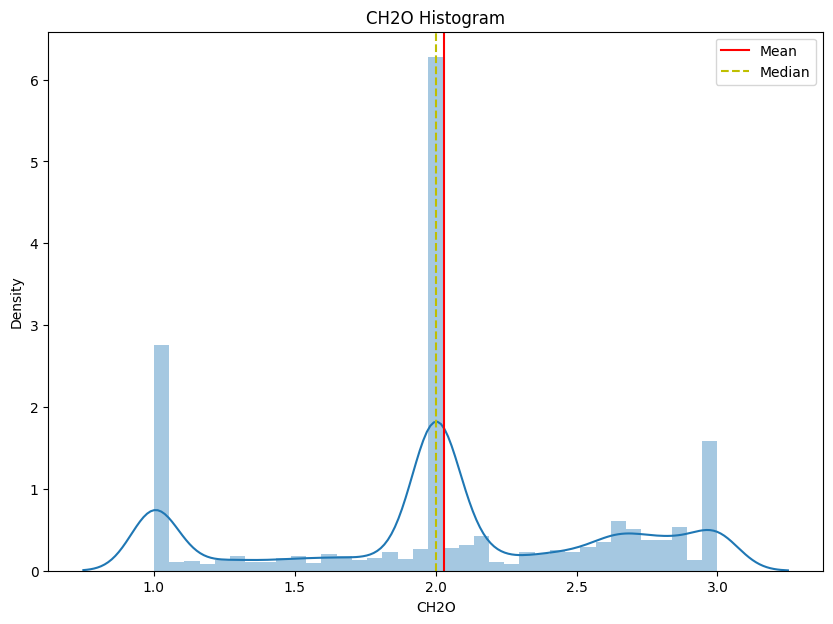

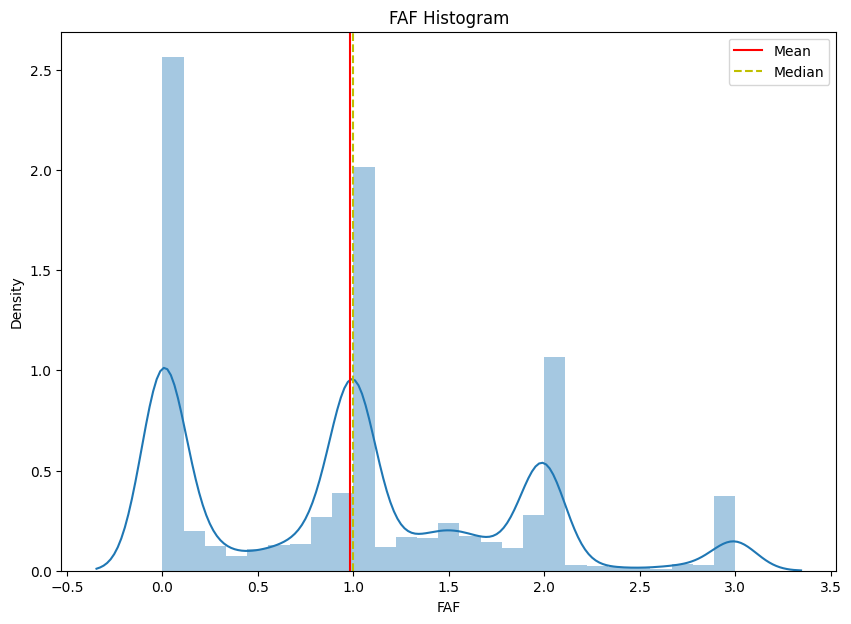

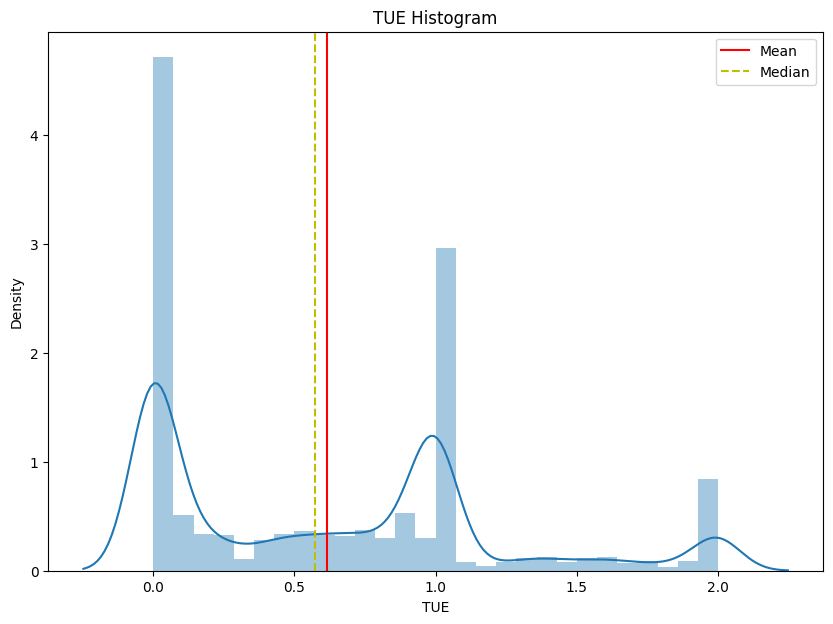

In [10]:
for col in num_cols:
    plt.figure(figsize=[10,7])
    sns.distplot(df[col],kde=True).set(title= col+' Histogram')
    plt.axvline(df[col].mean(),color='r', label='Mean')
    plt.axvline(df[col].median(),color='y', linestyle='--',label='Median')
    plt.legend()
    plt.show()


In [11]:
cat_cols=df[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']]


In [12]:
import plotly.express as px
fig = px.sunburst(
    df,
    path=['NObeyesdad','Gender','MTRANS','family_history_with_overweight','SMOKE'], 
    color='Gender',color_discrete_map={'Male':'gold', 'Female':'darkblue'},
    width=1200, height=1200
)
fig.show()



## Analysis Note:
Obesity type 2 and Obesity type 3 are specific to one gender only as per the dataset

In [13]:
num_cols.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [14]:
cat_cols.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

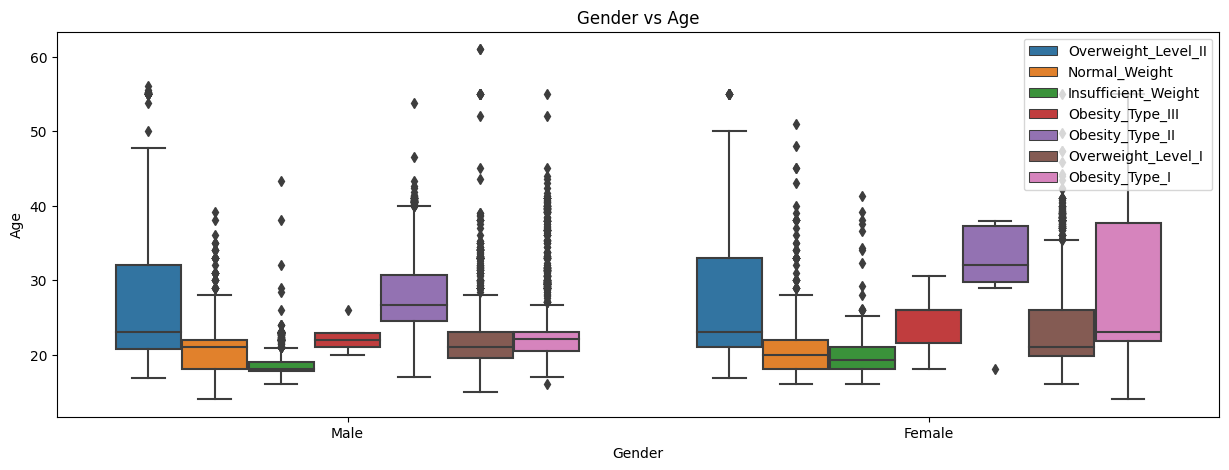

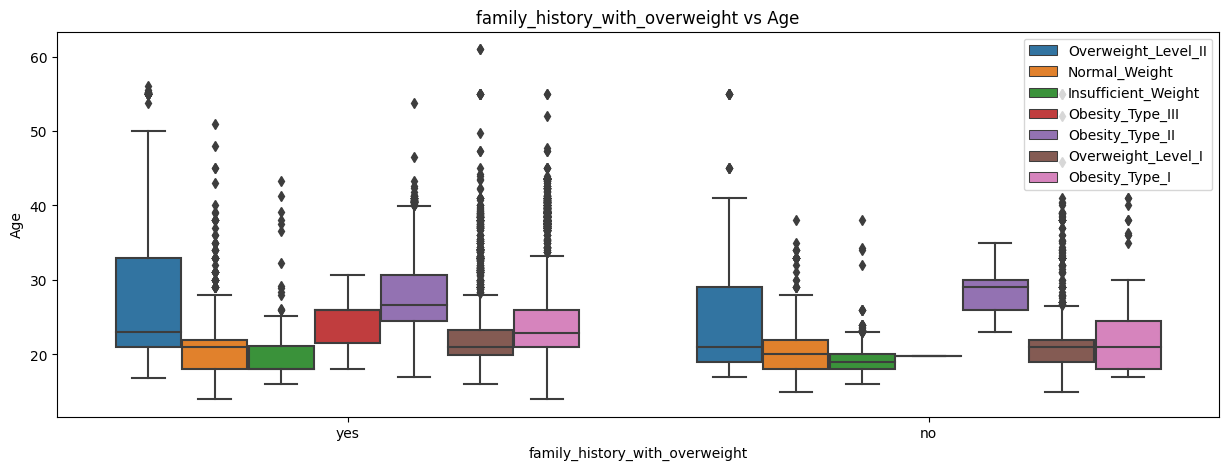

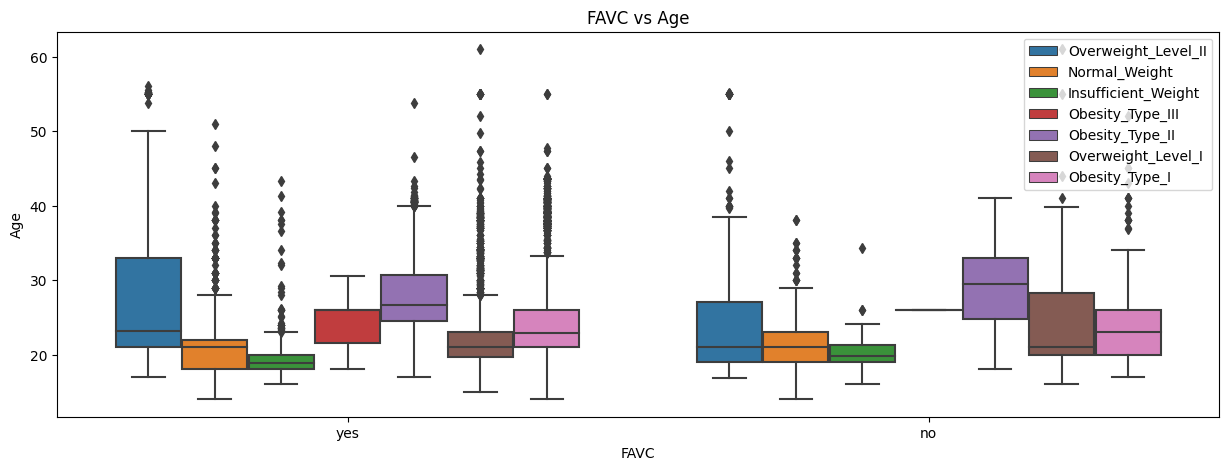

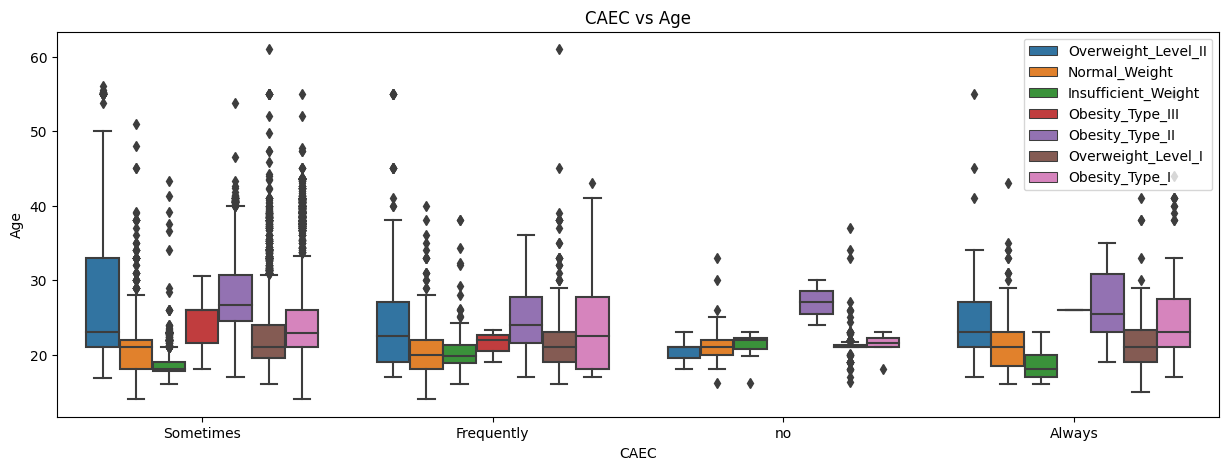

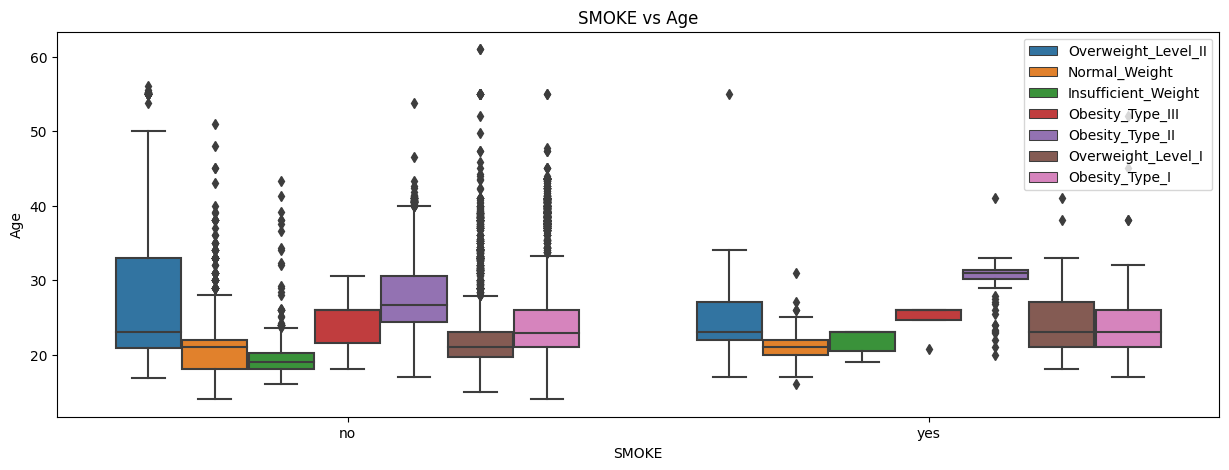

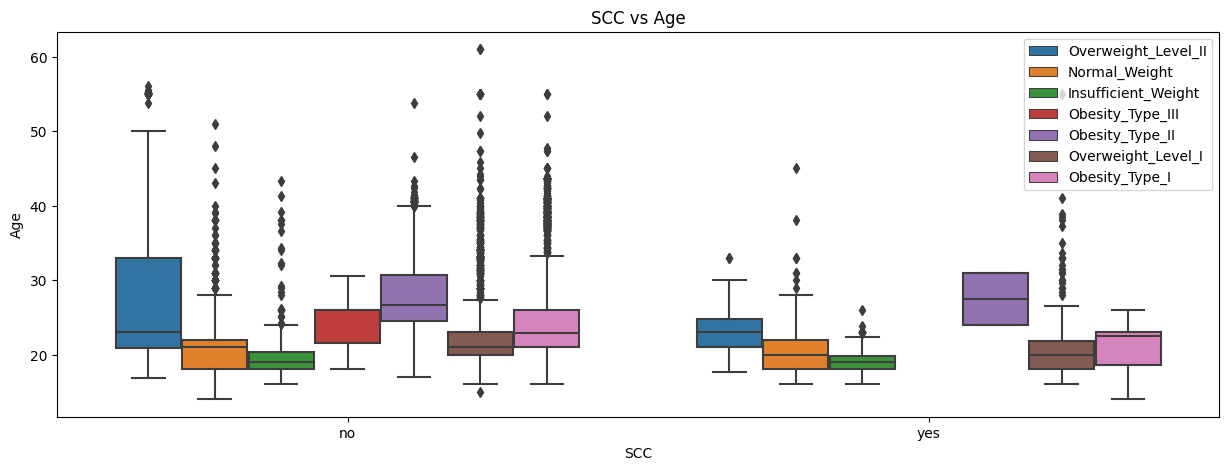

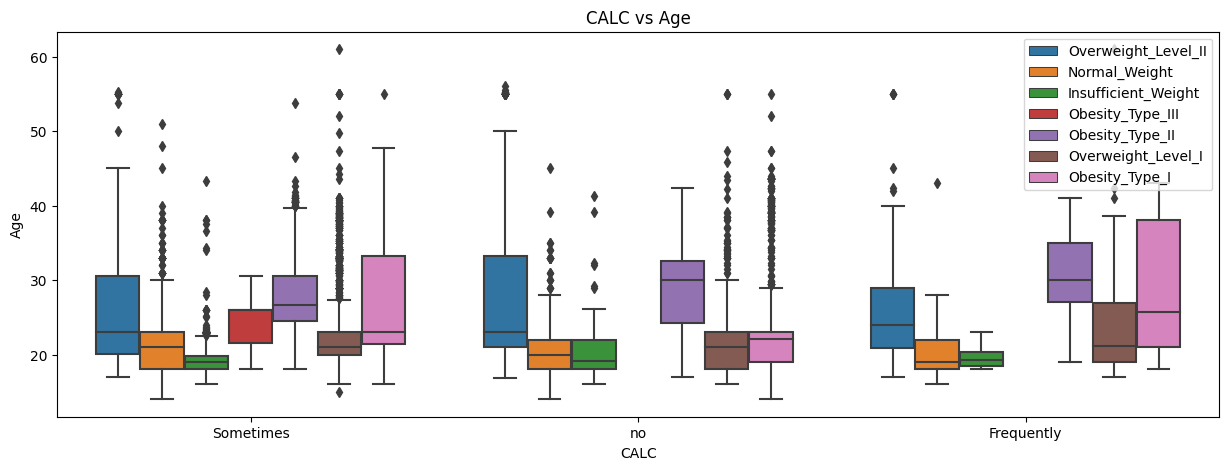

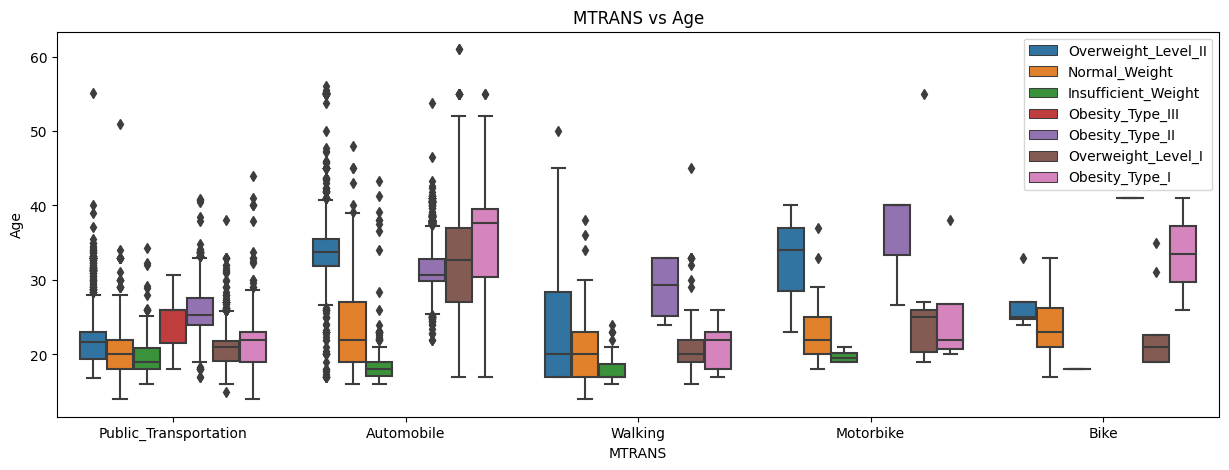

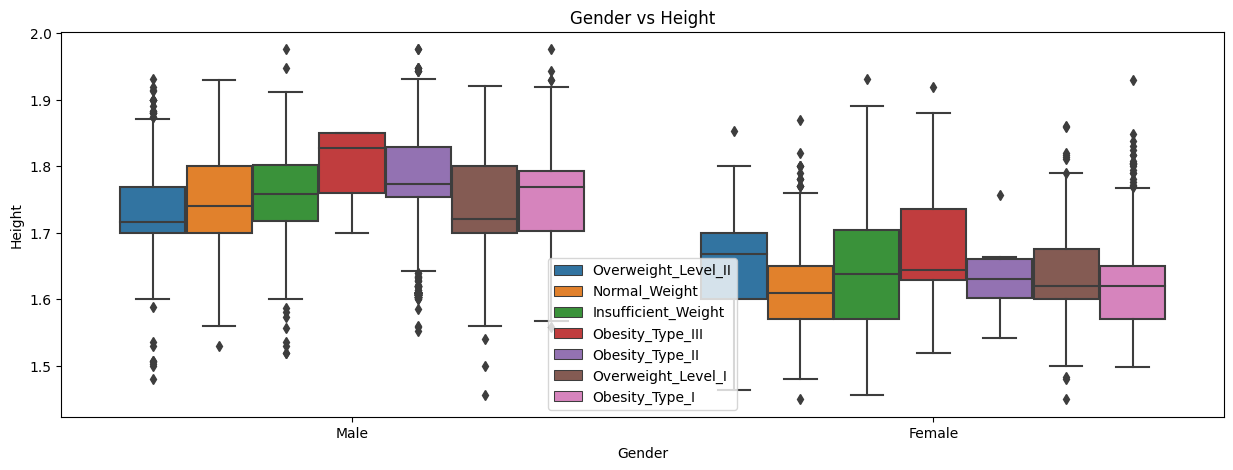

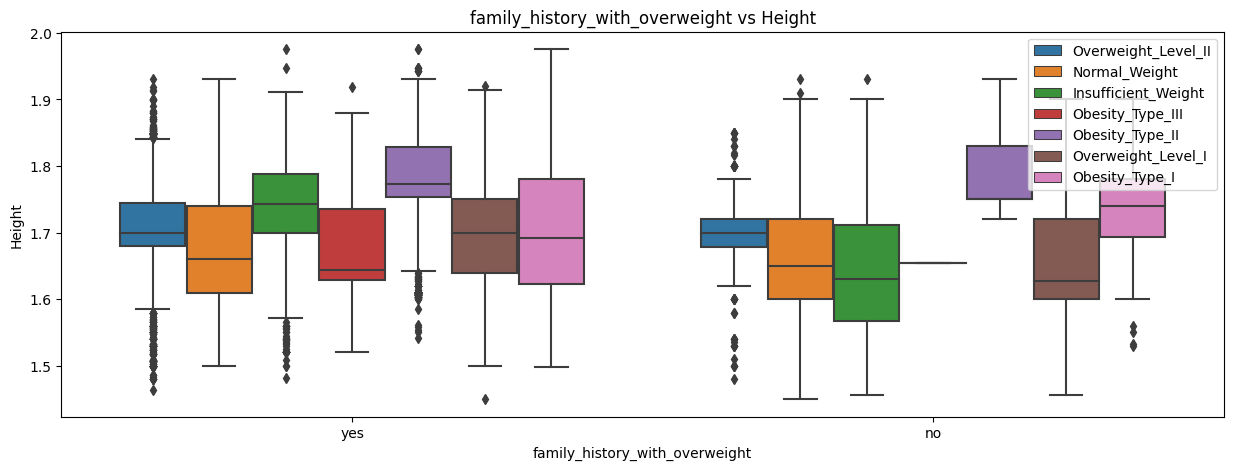

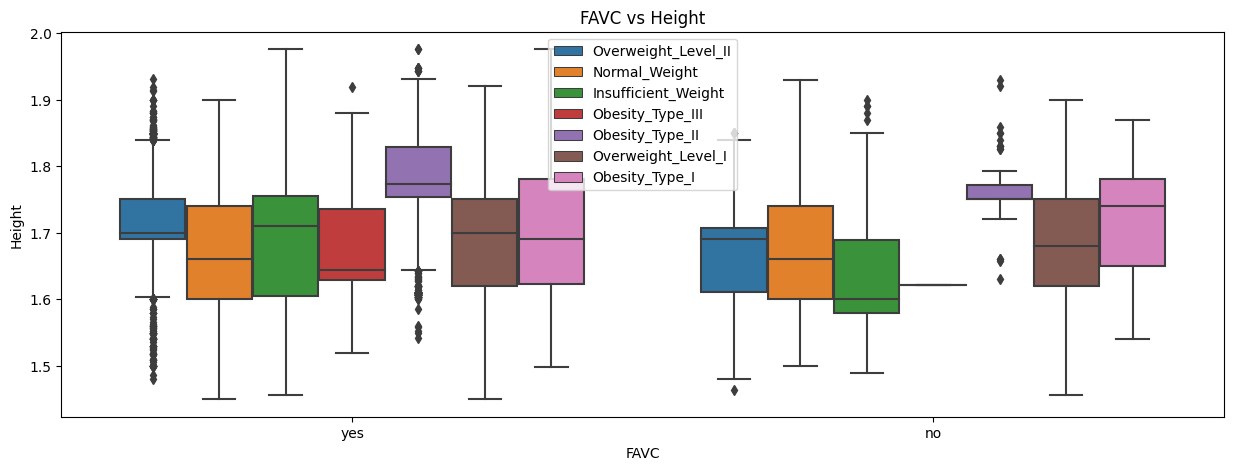

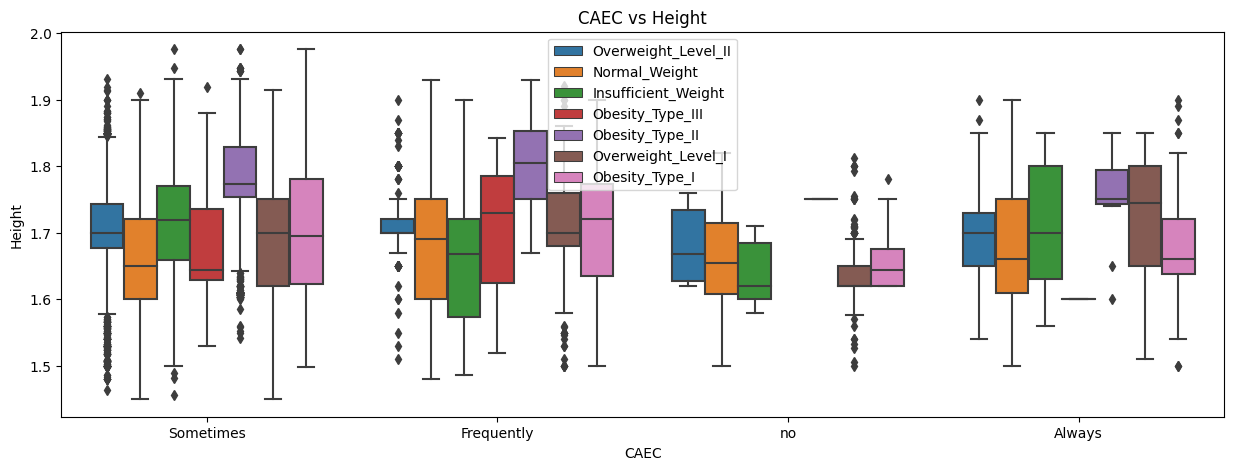

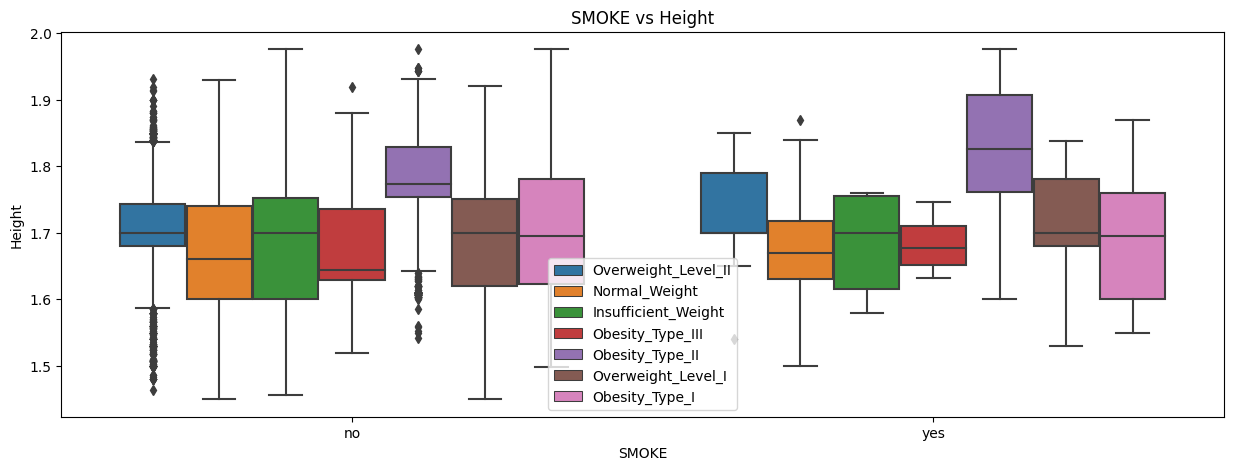

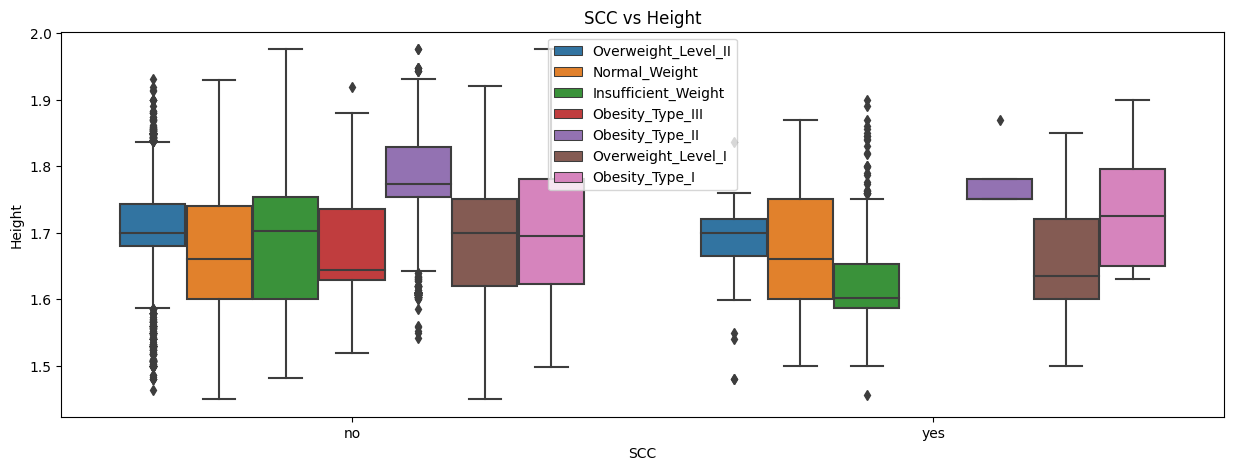

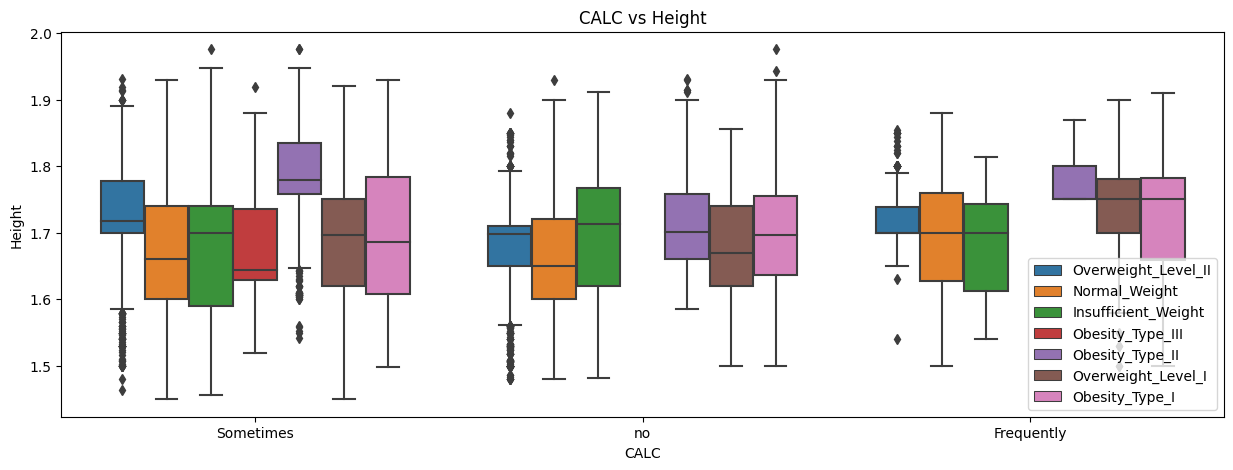

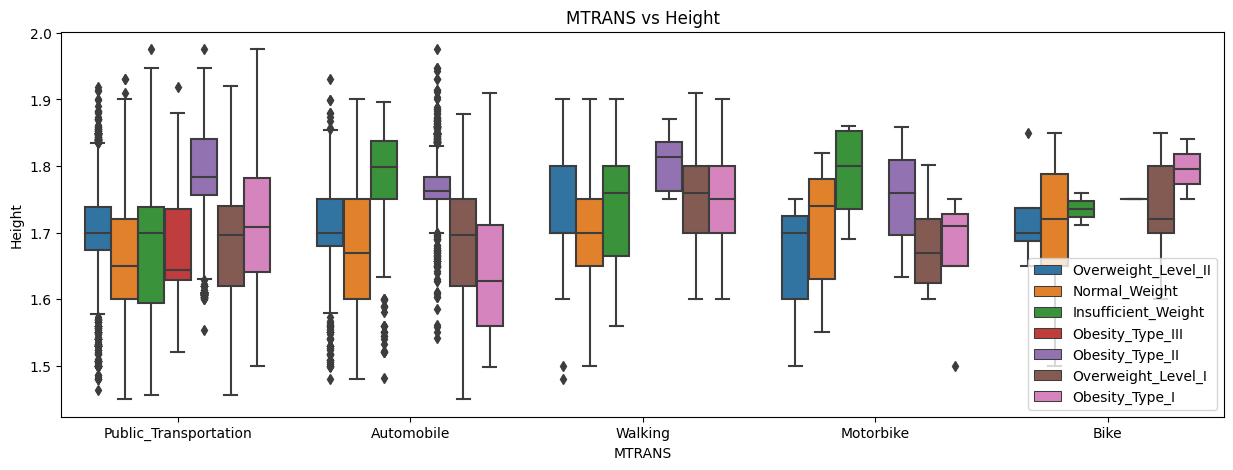

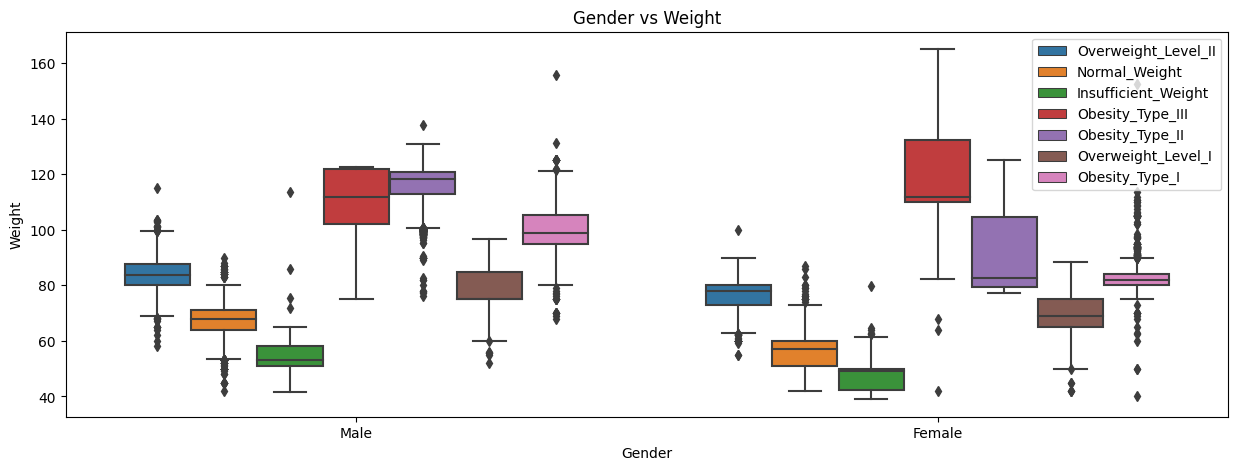

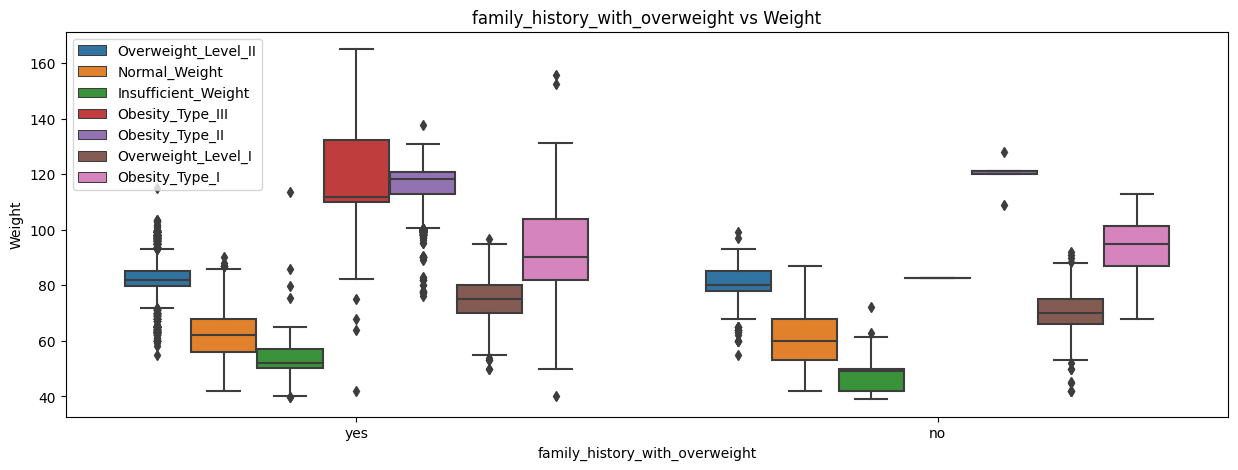

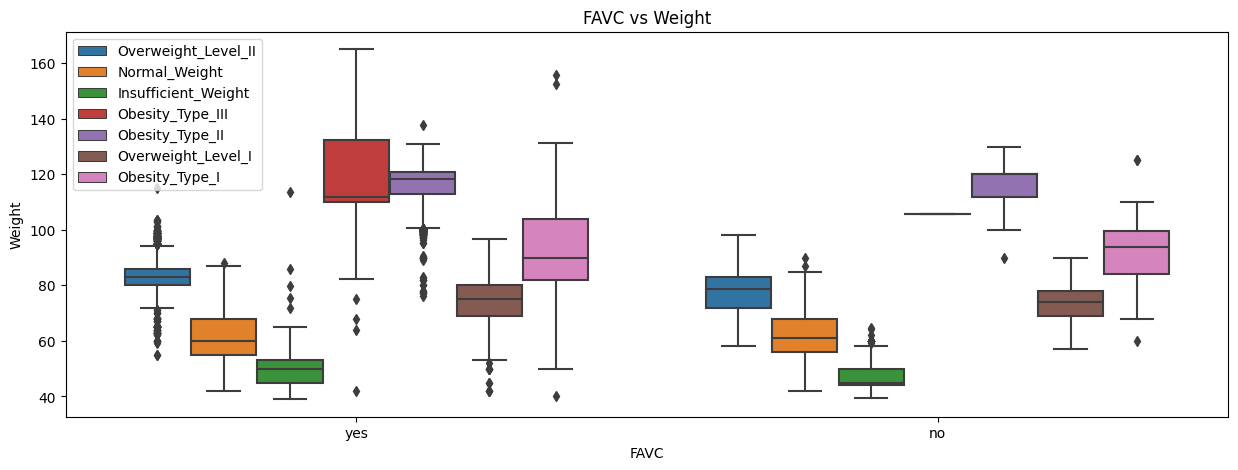

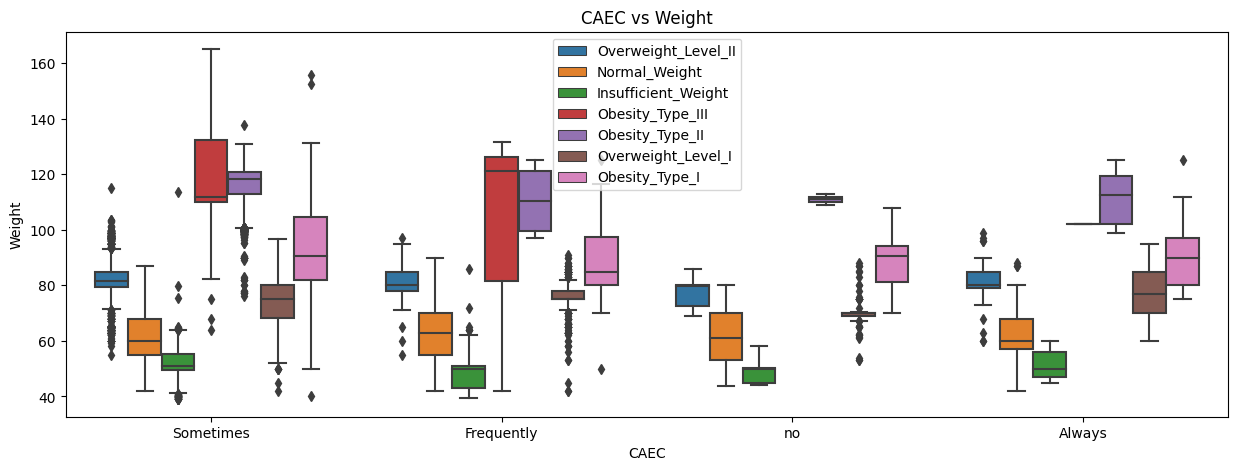

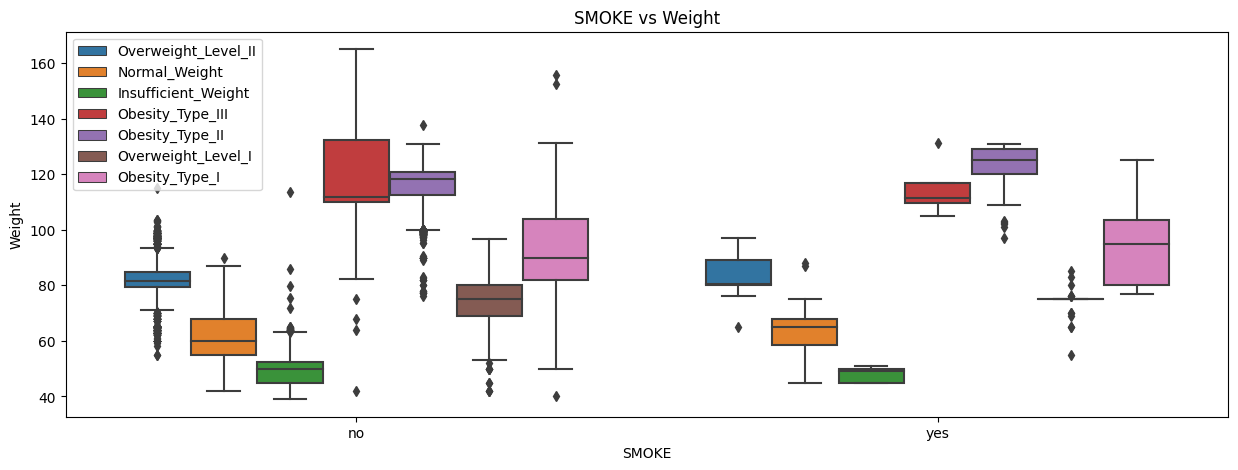

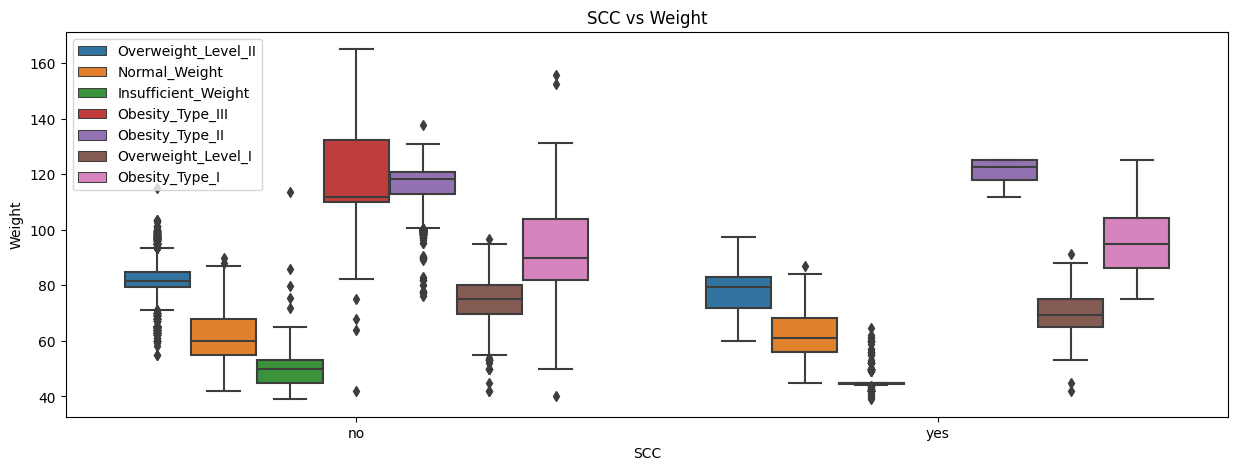

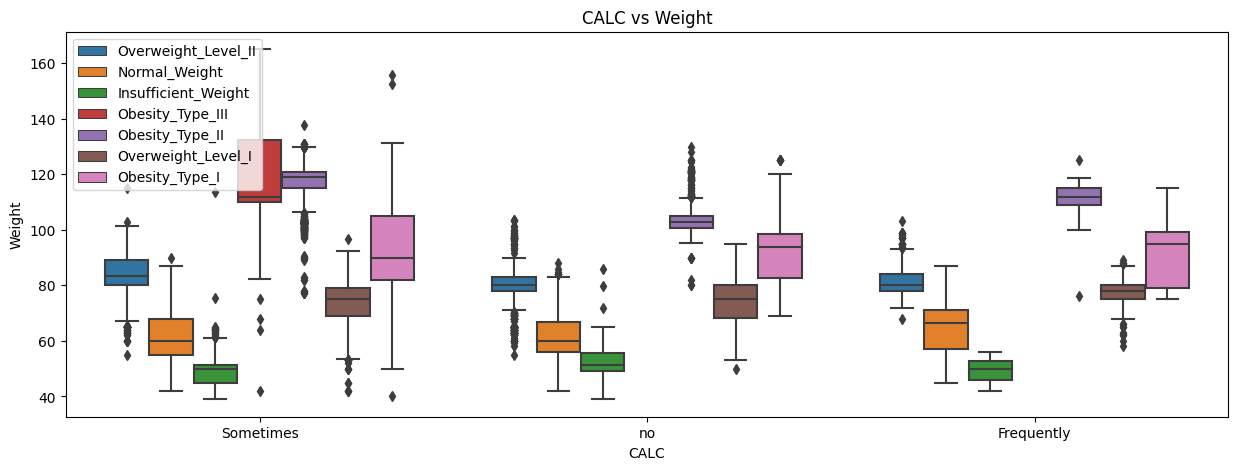

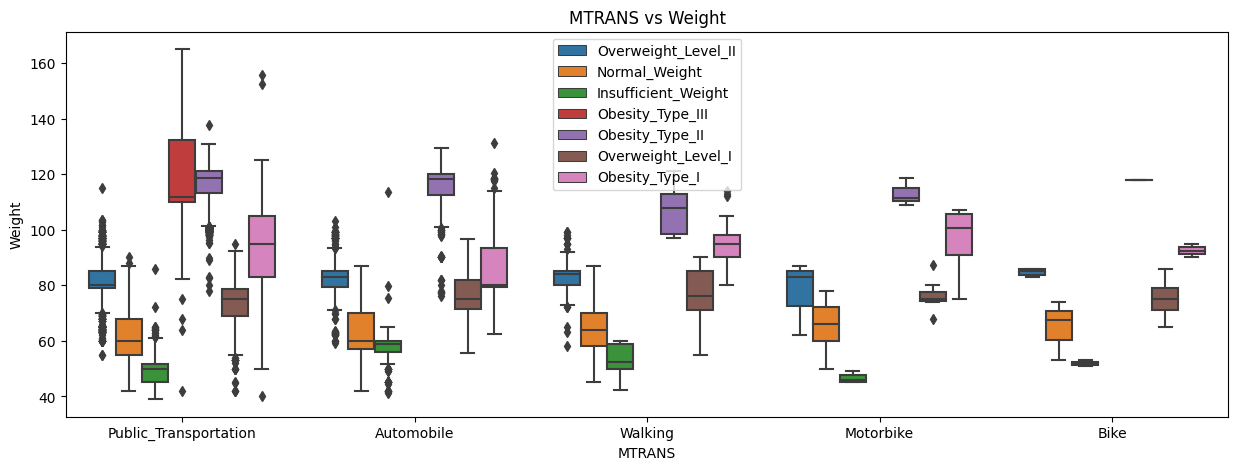

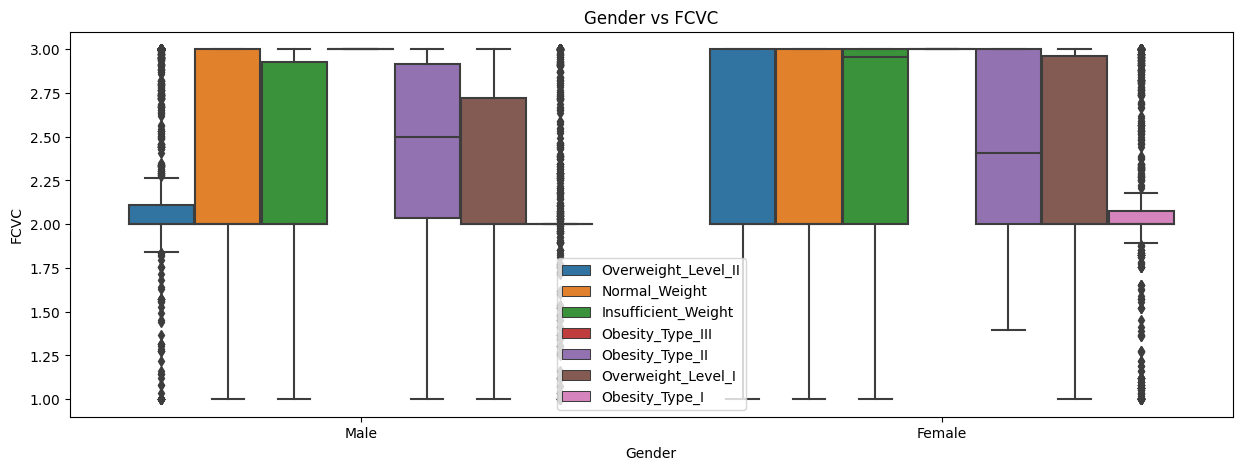

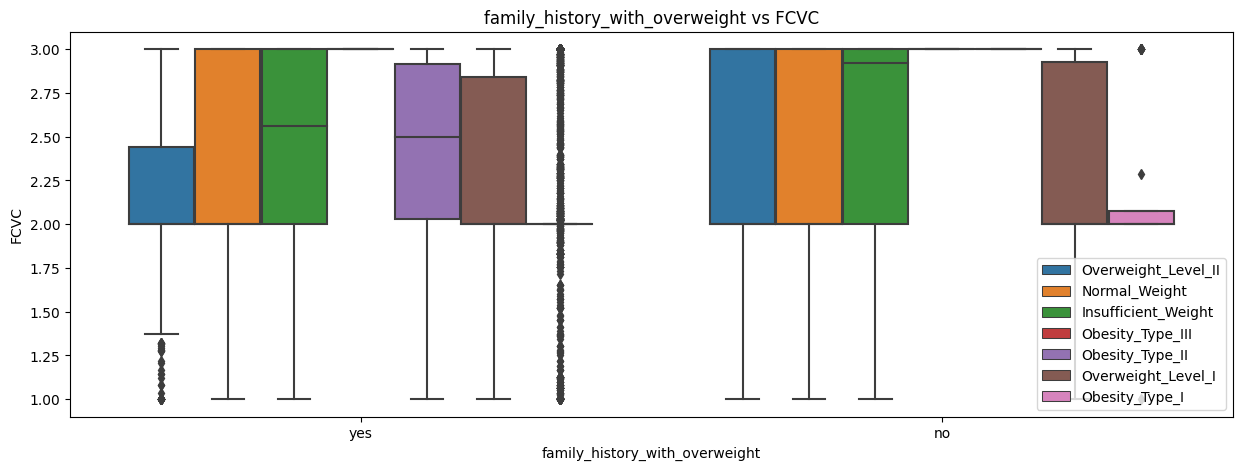

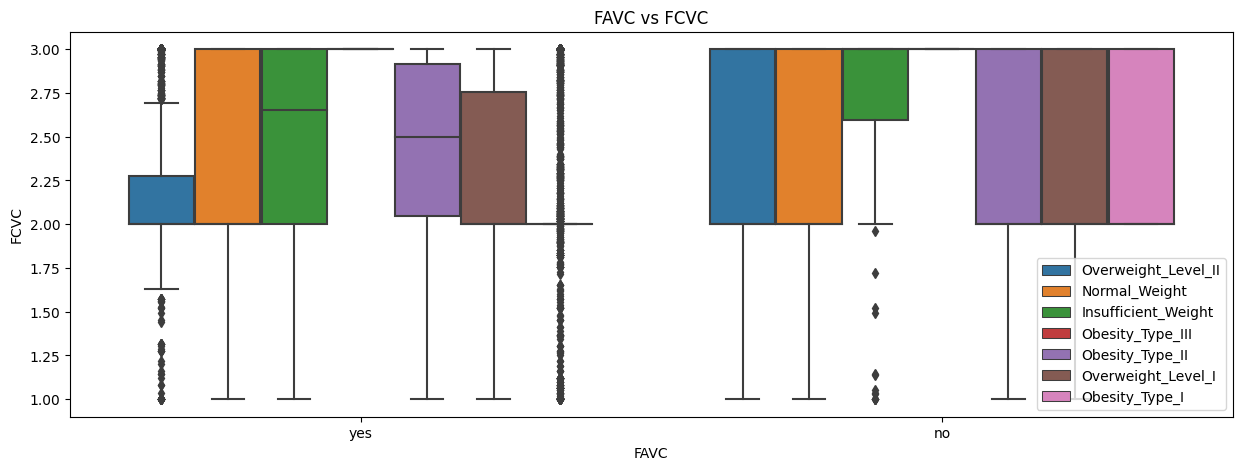

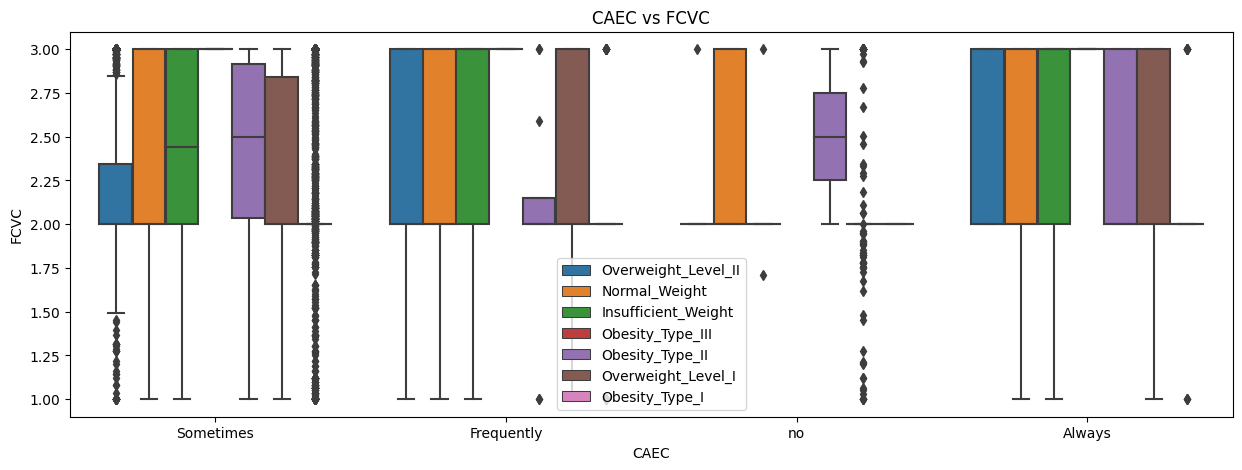

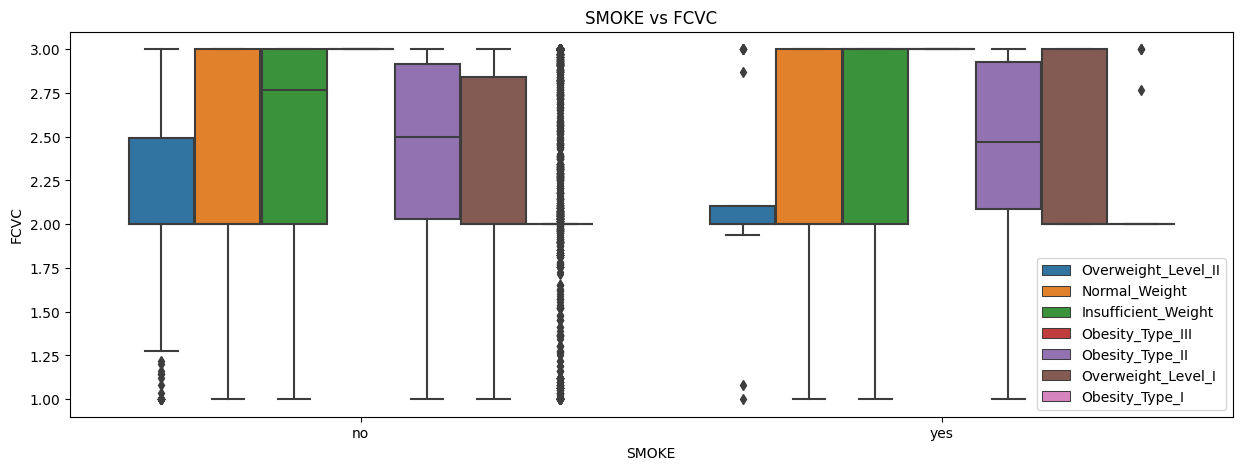

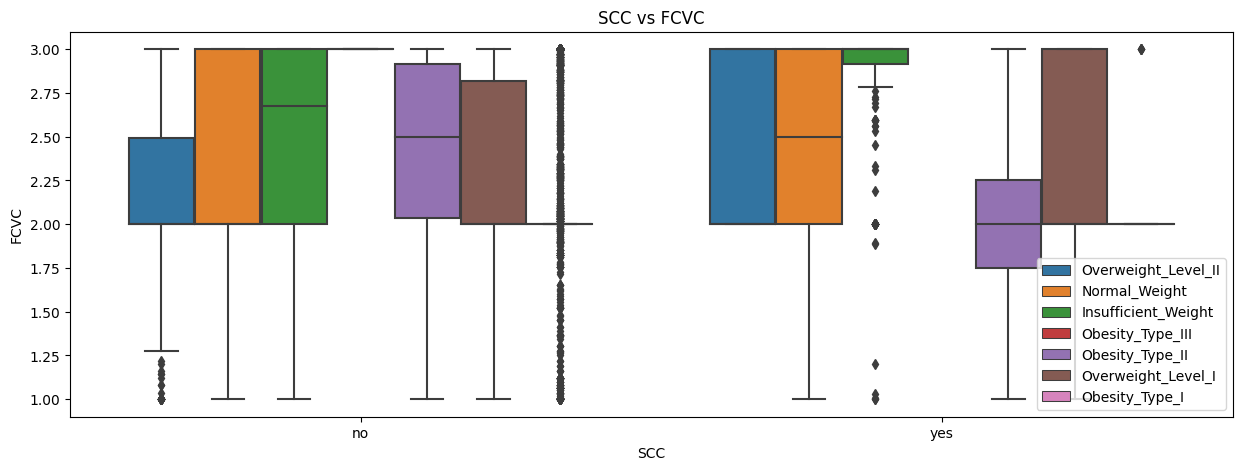

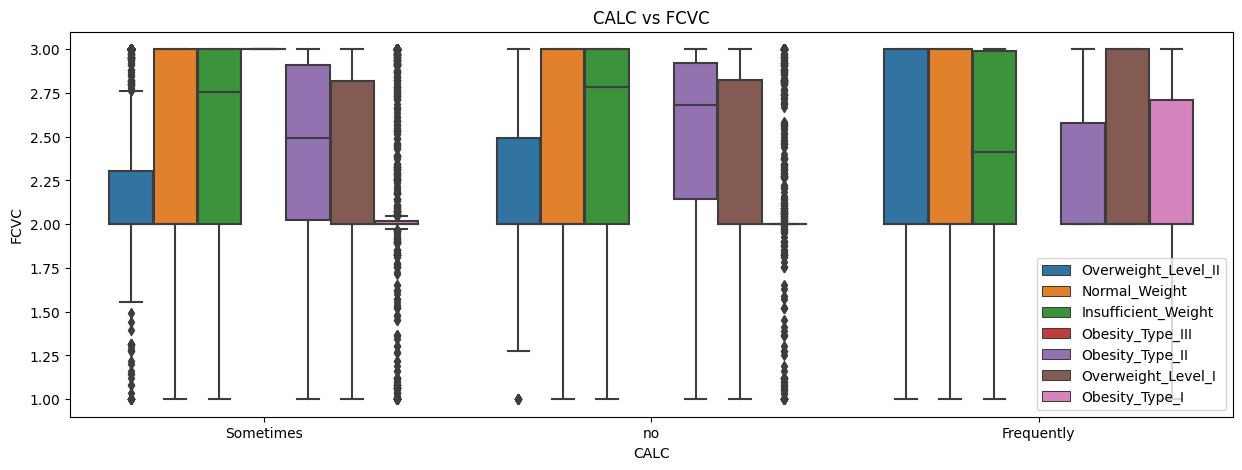

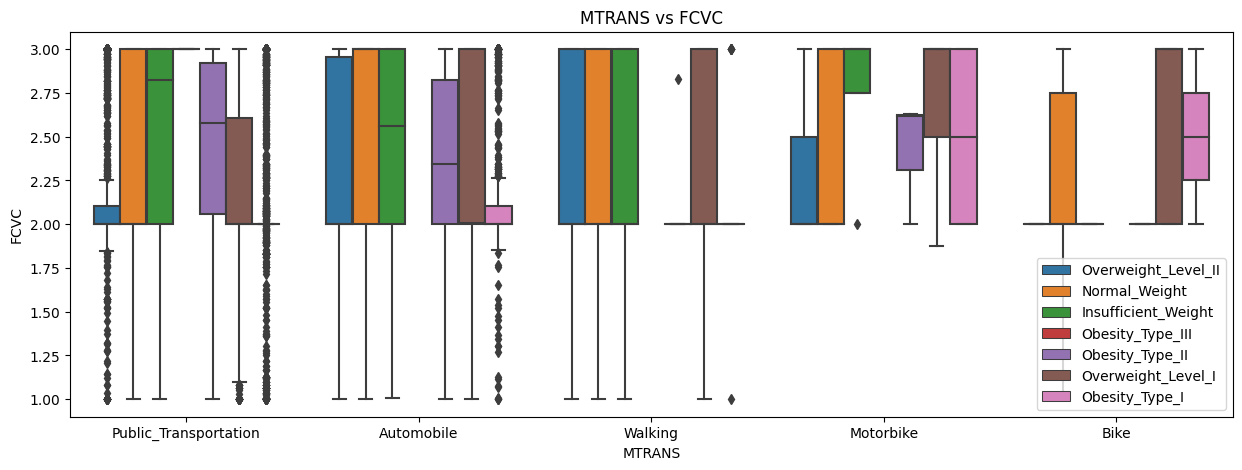

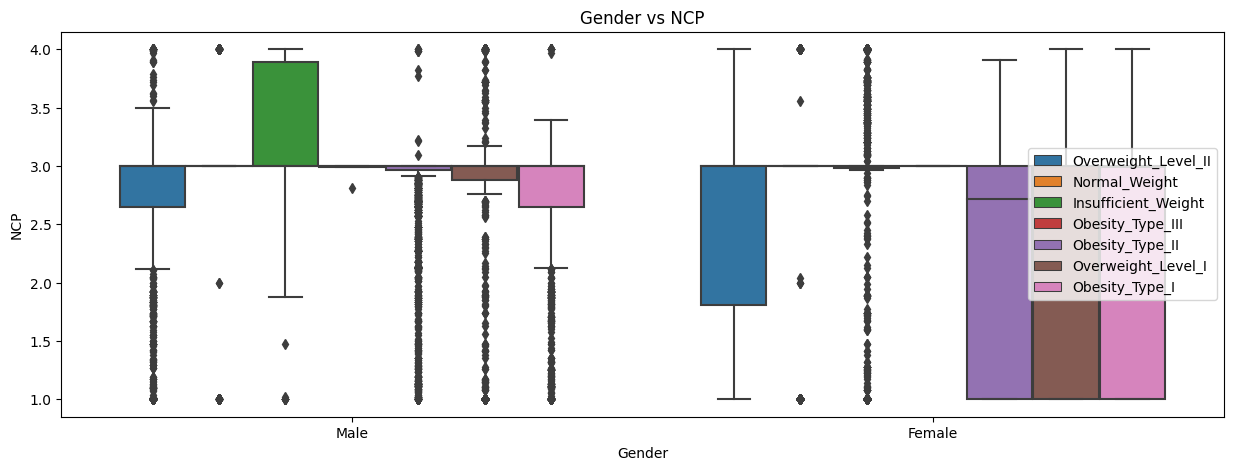

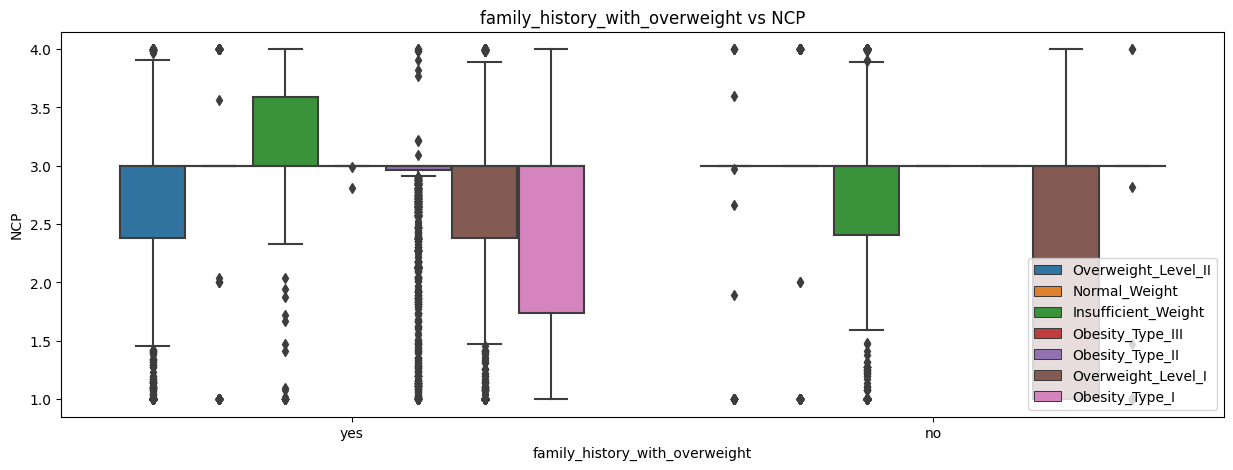

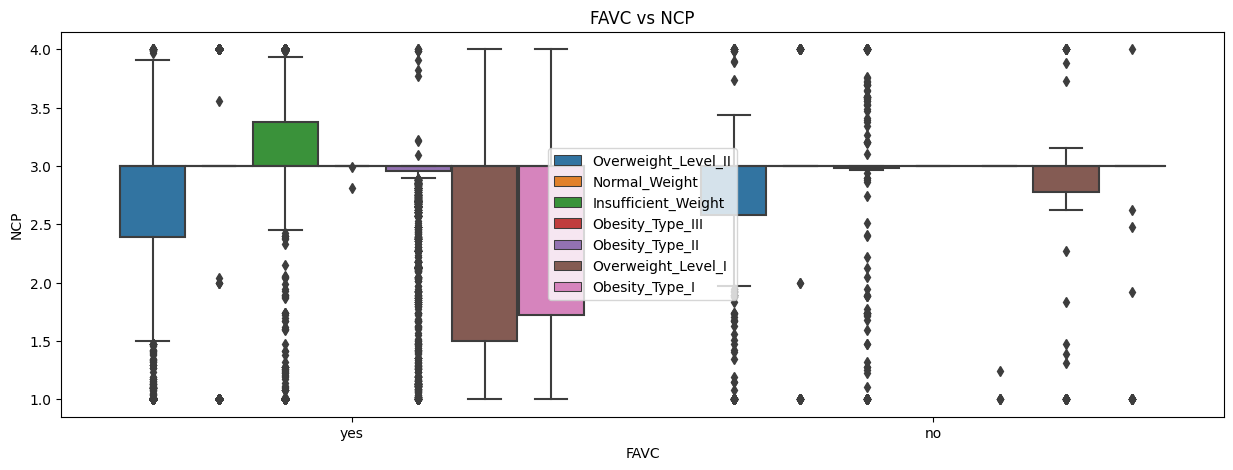

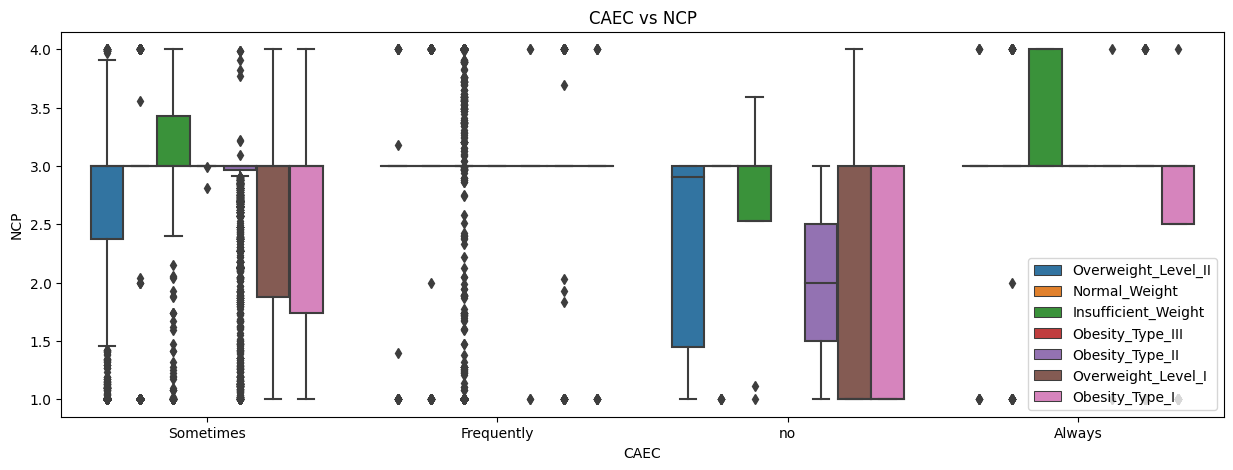

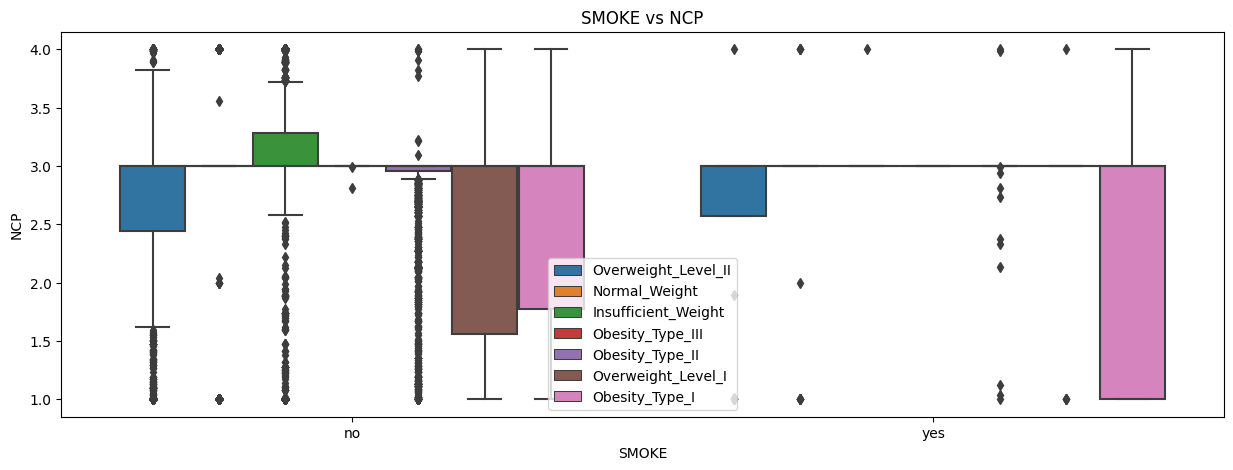

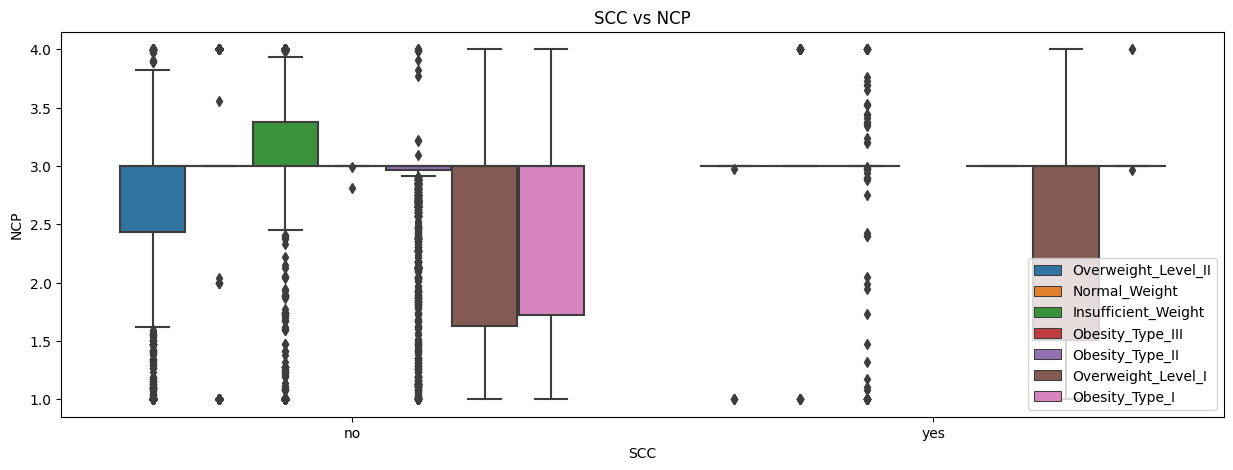

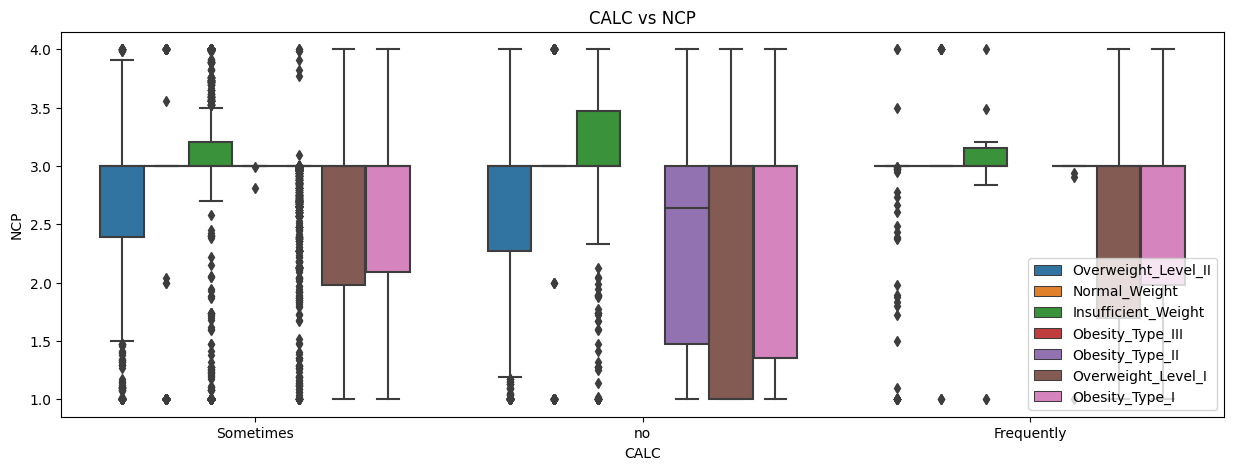

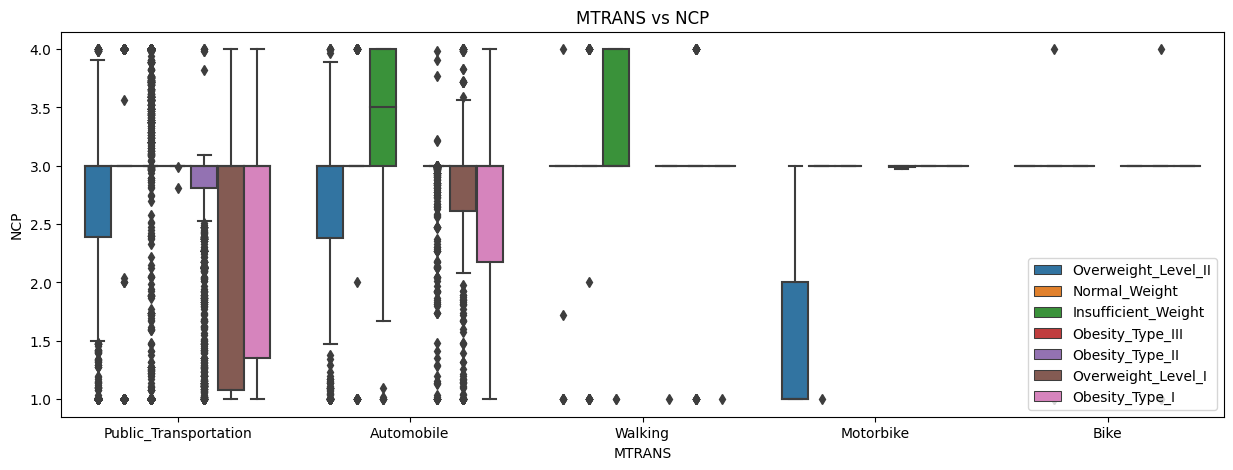

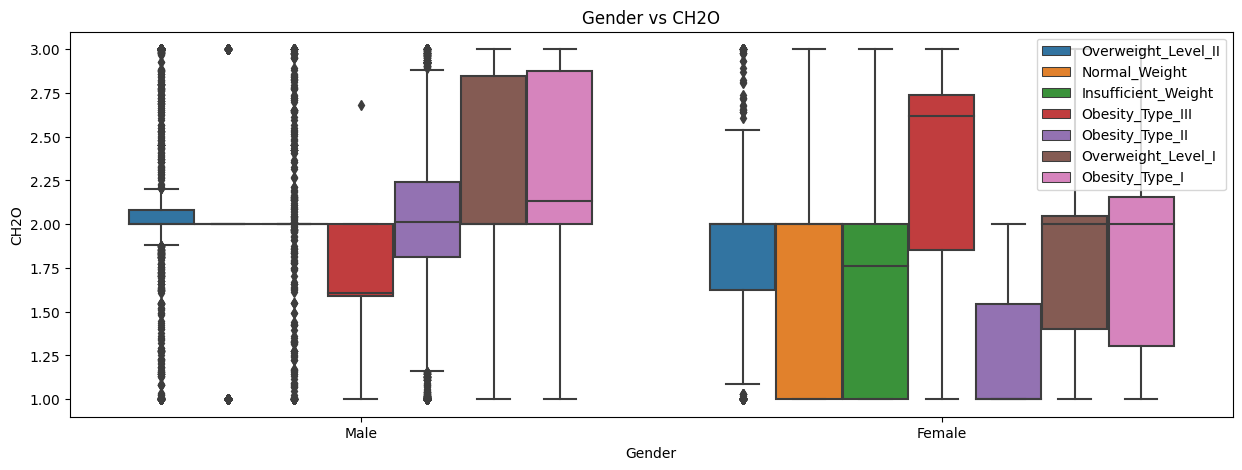

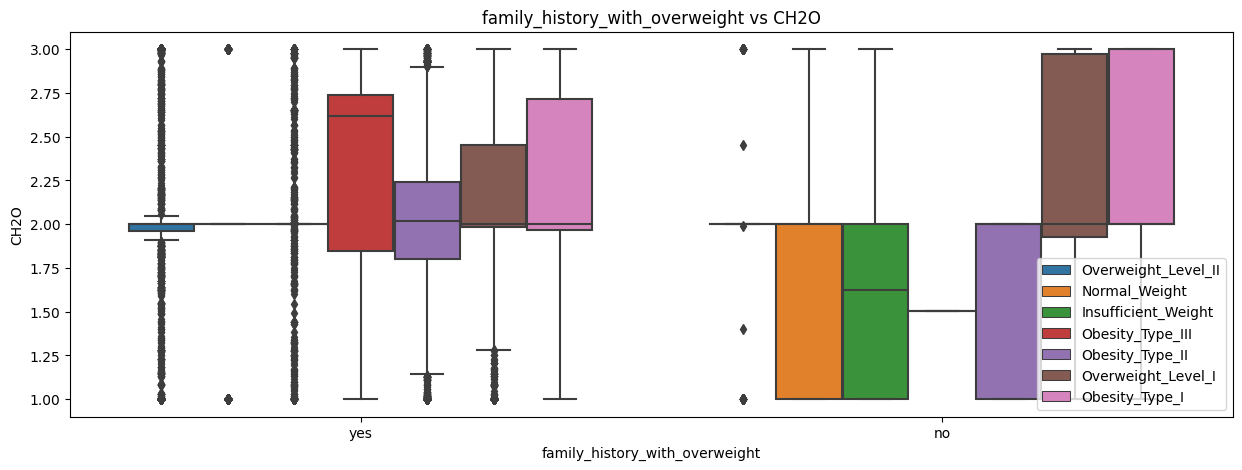

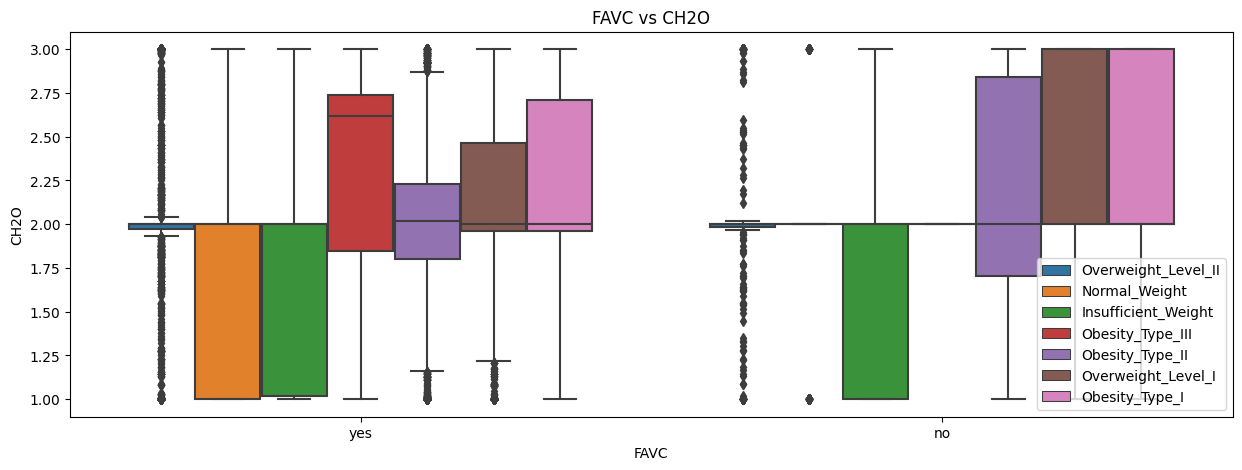

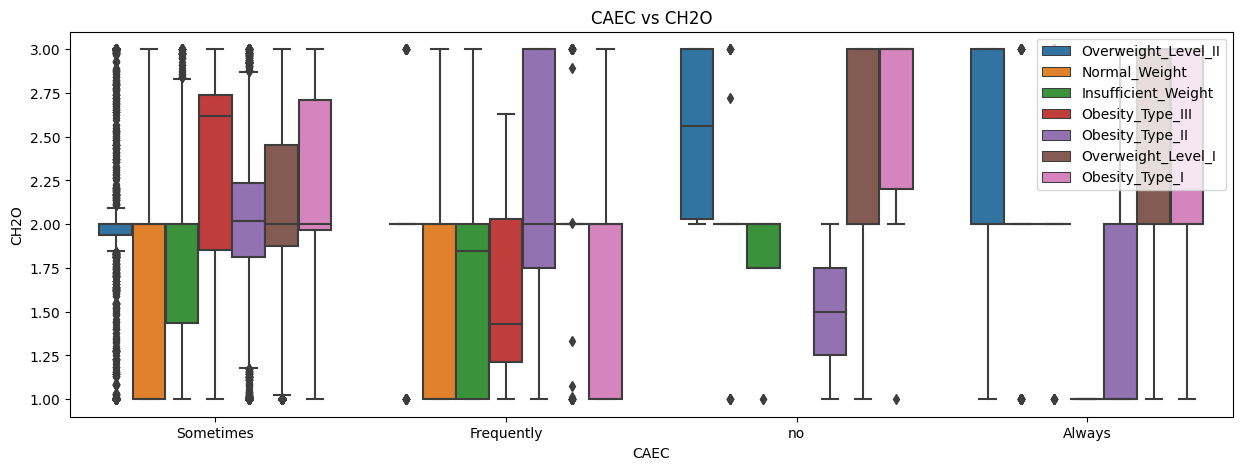

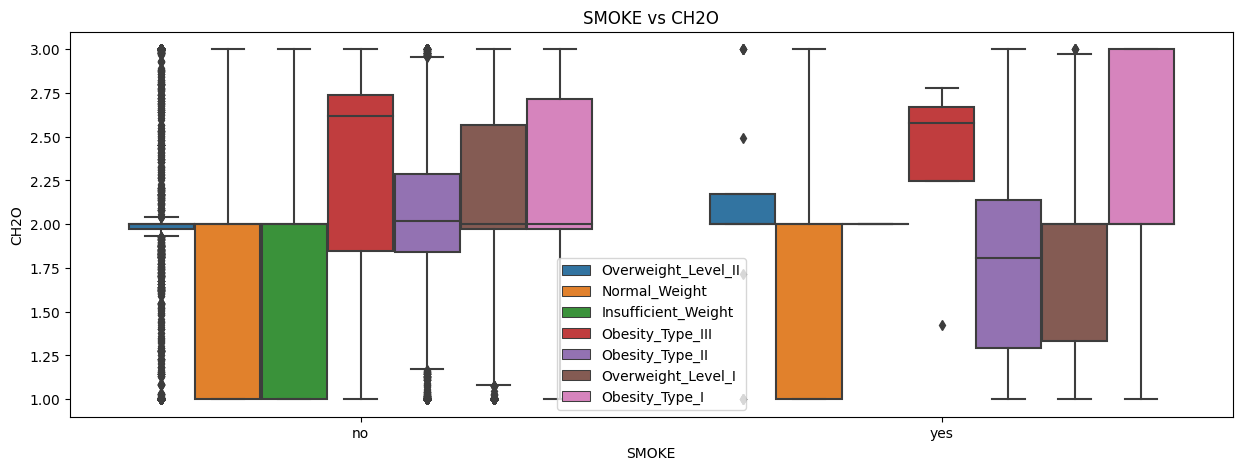

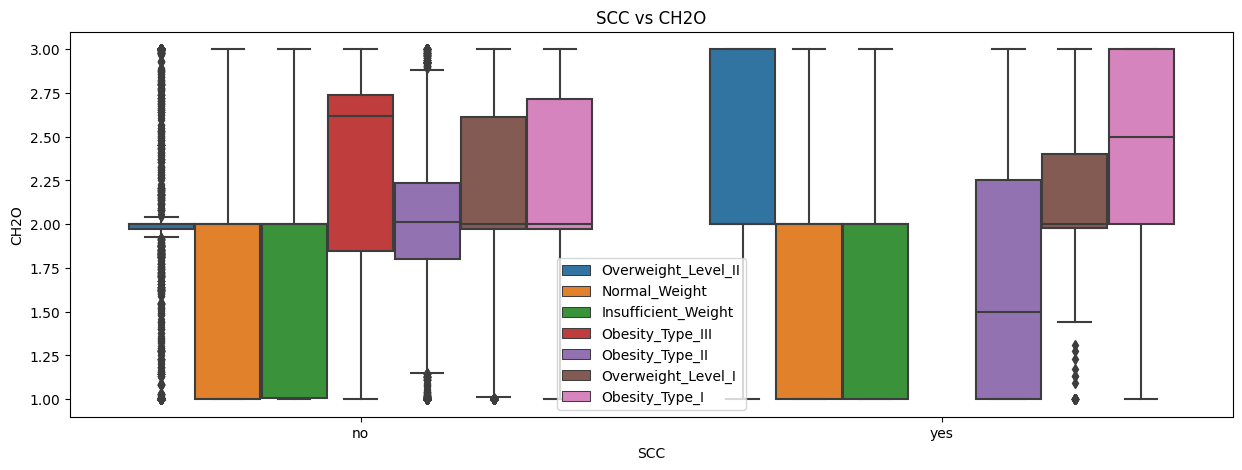

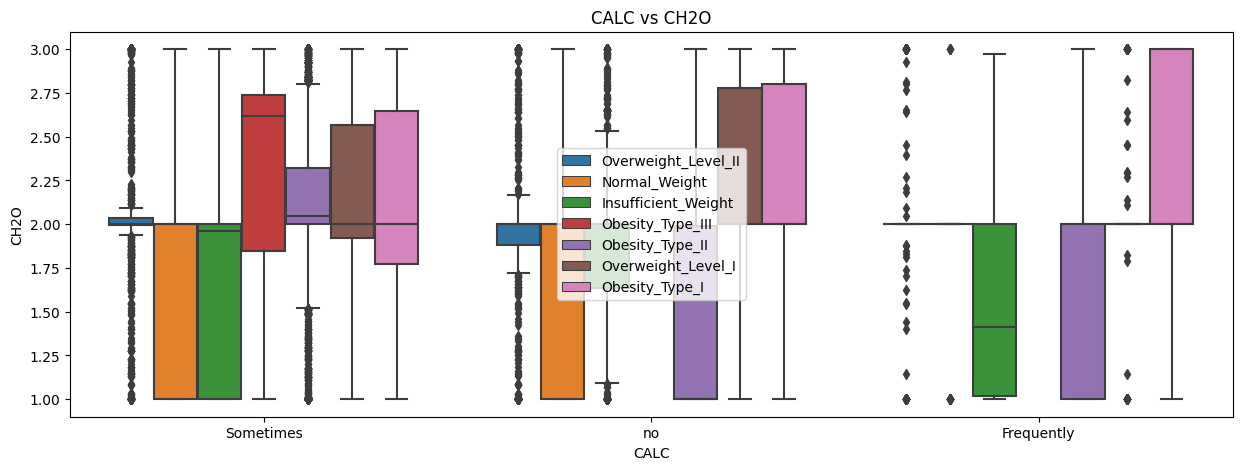

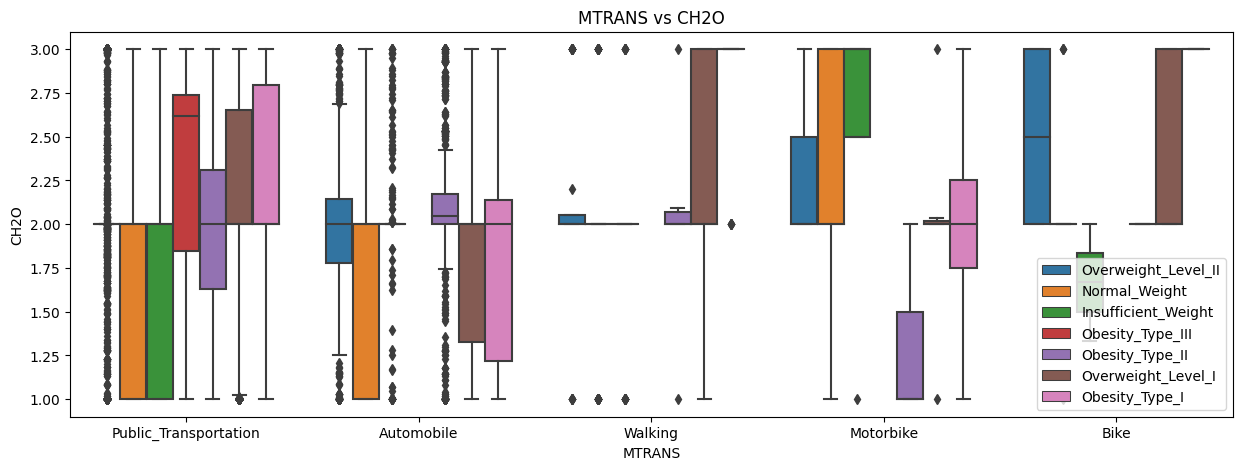

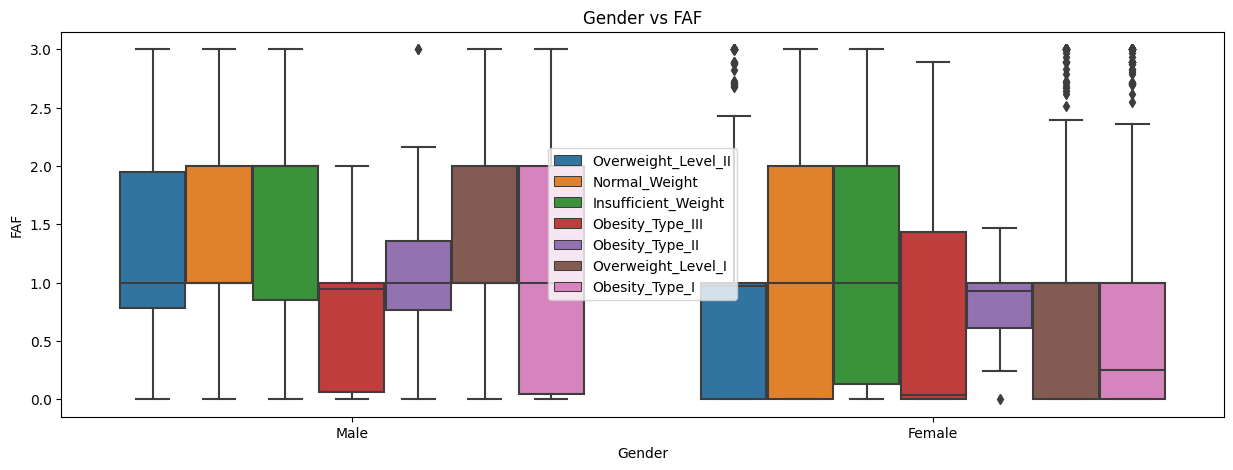

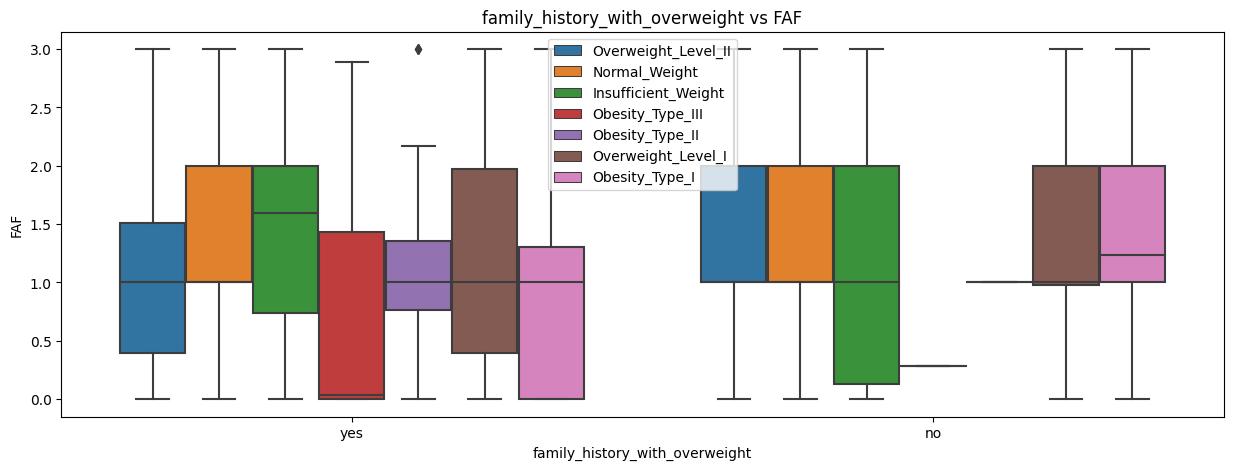

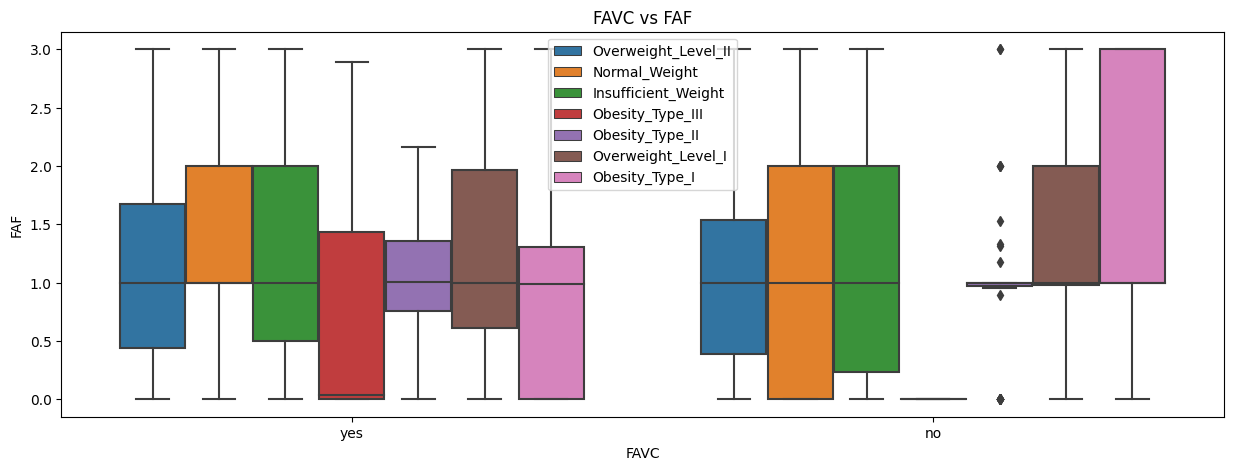

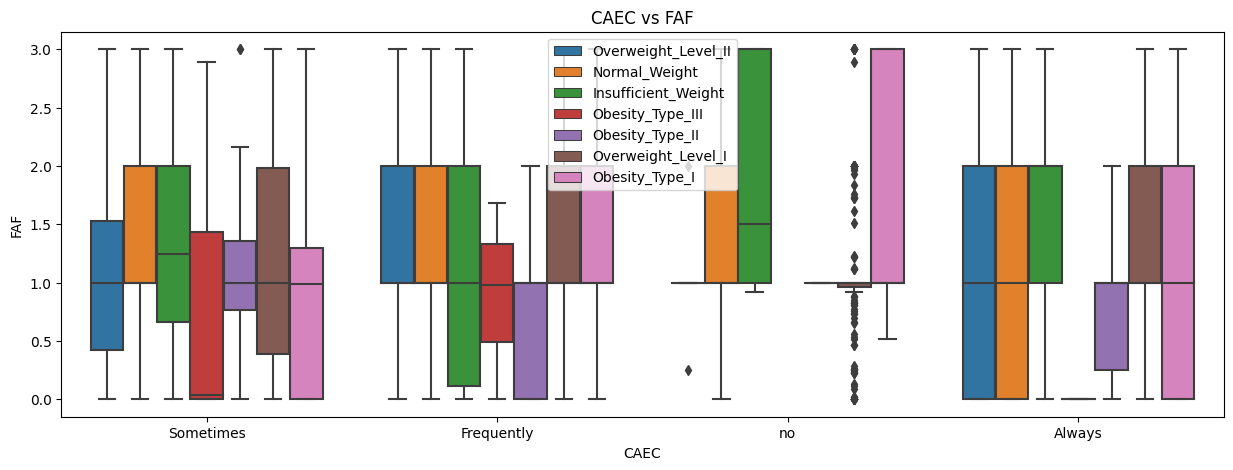

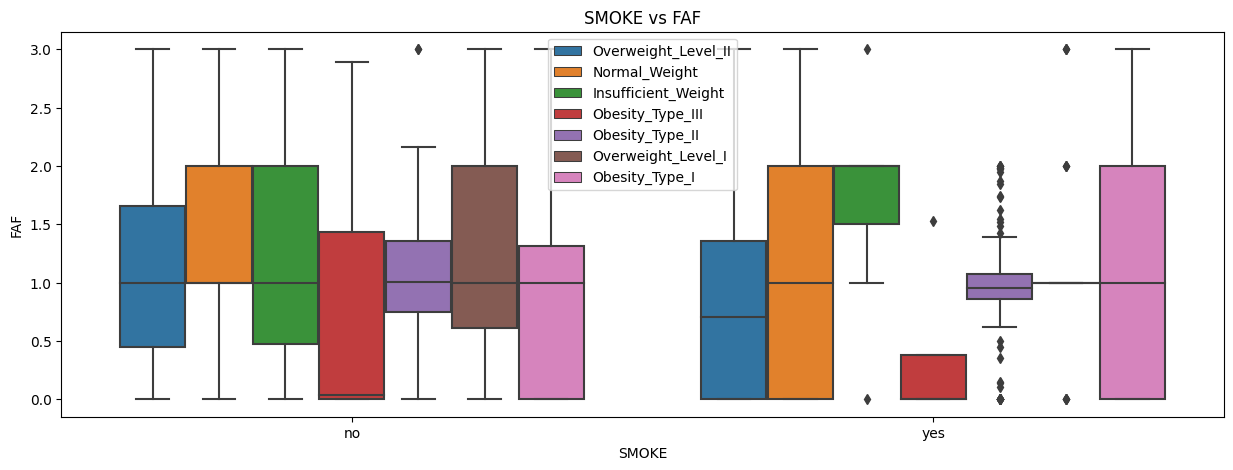

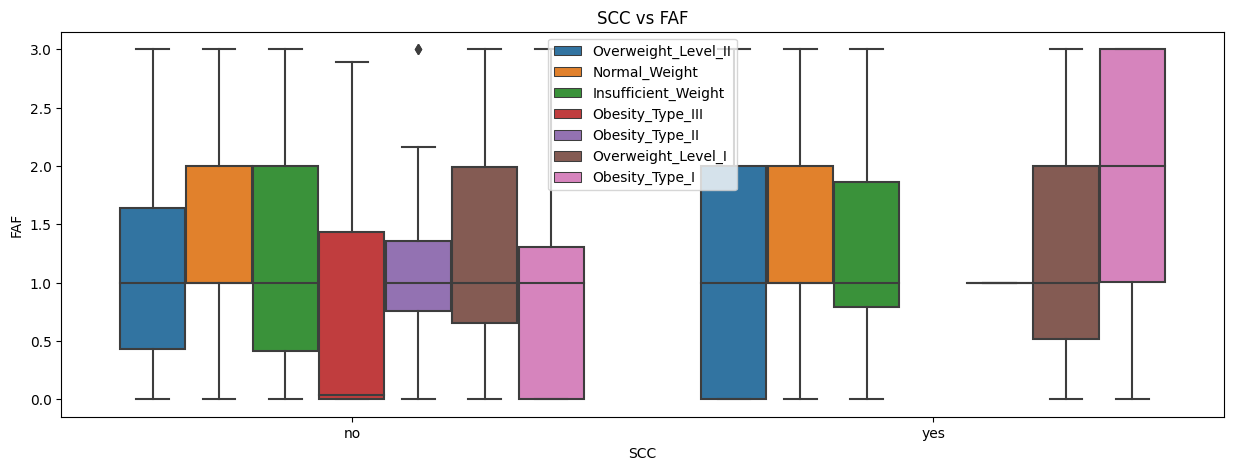

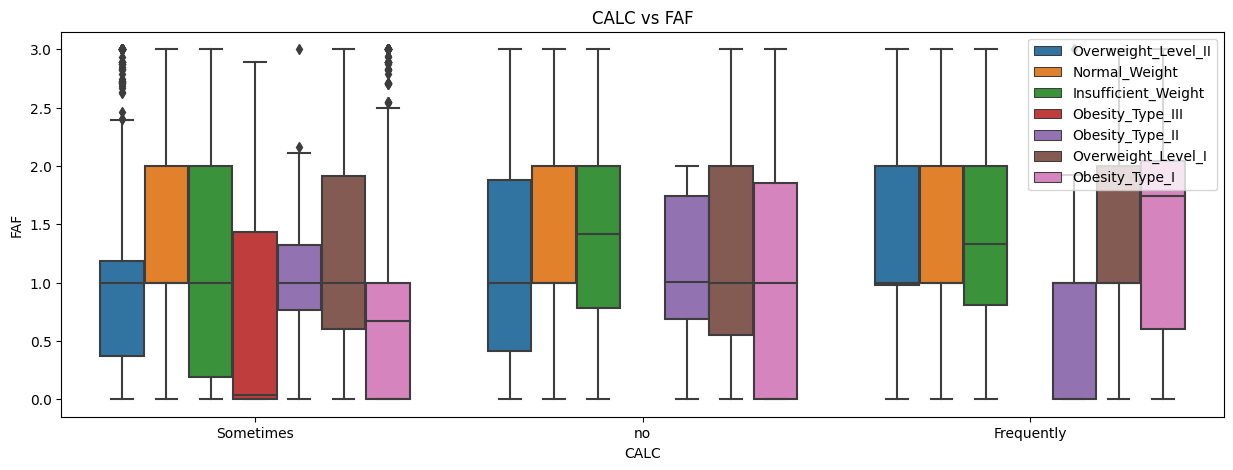

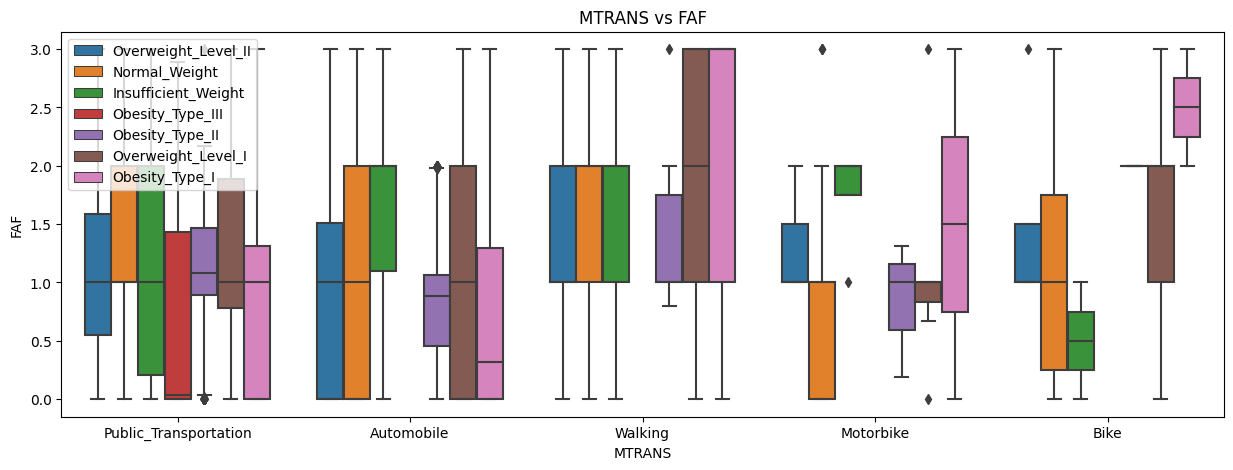

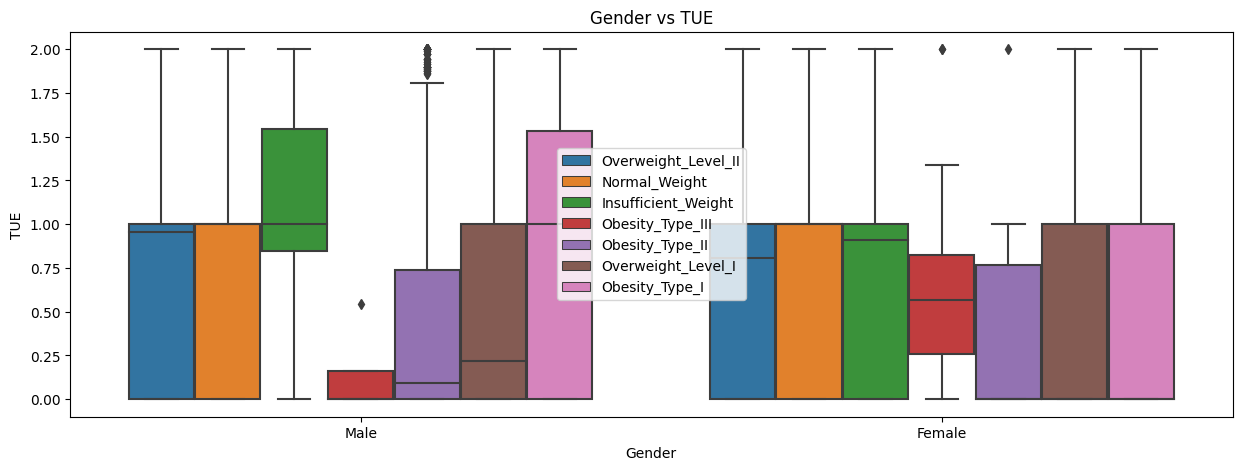

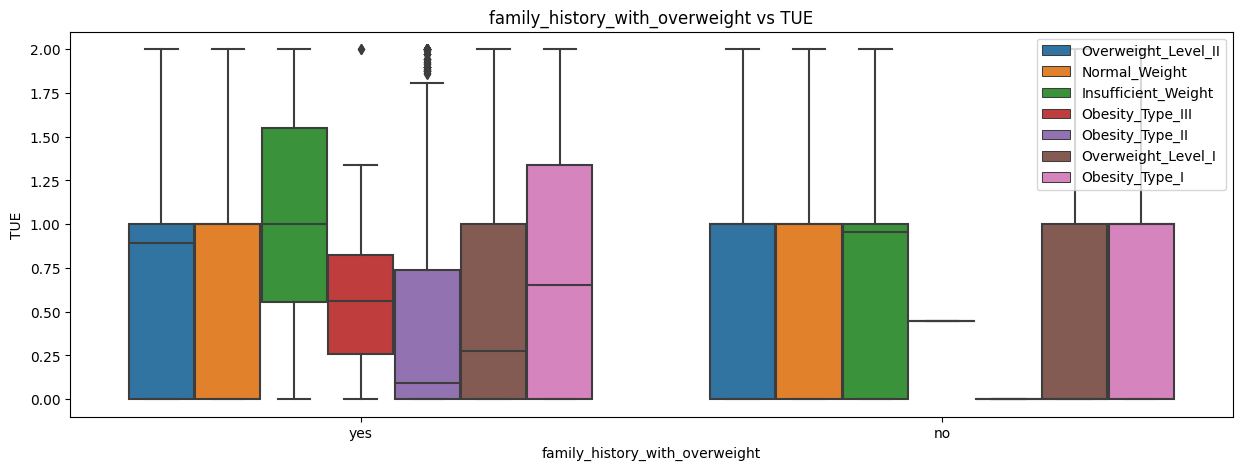

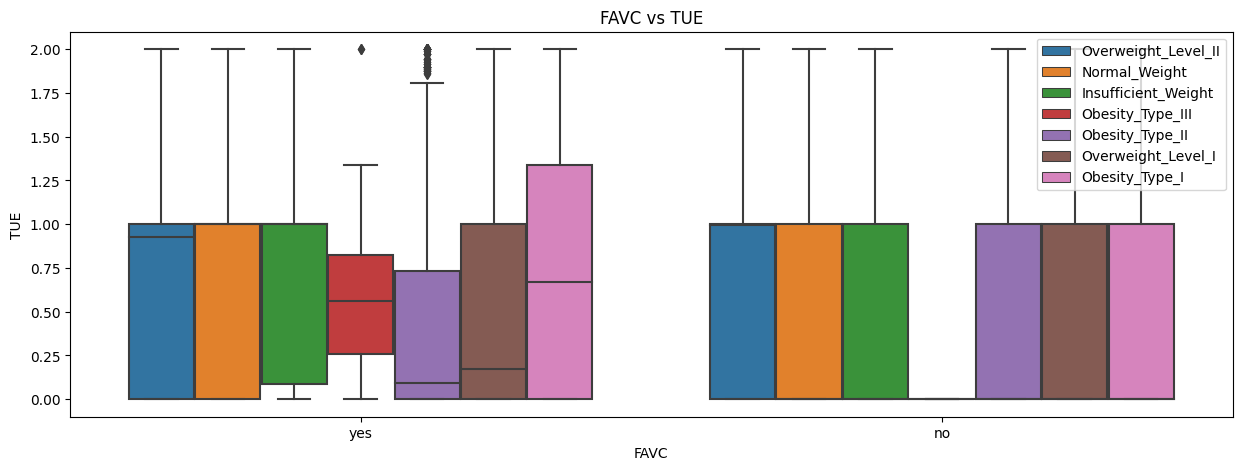

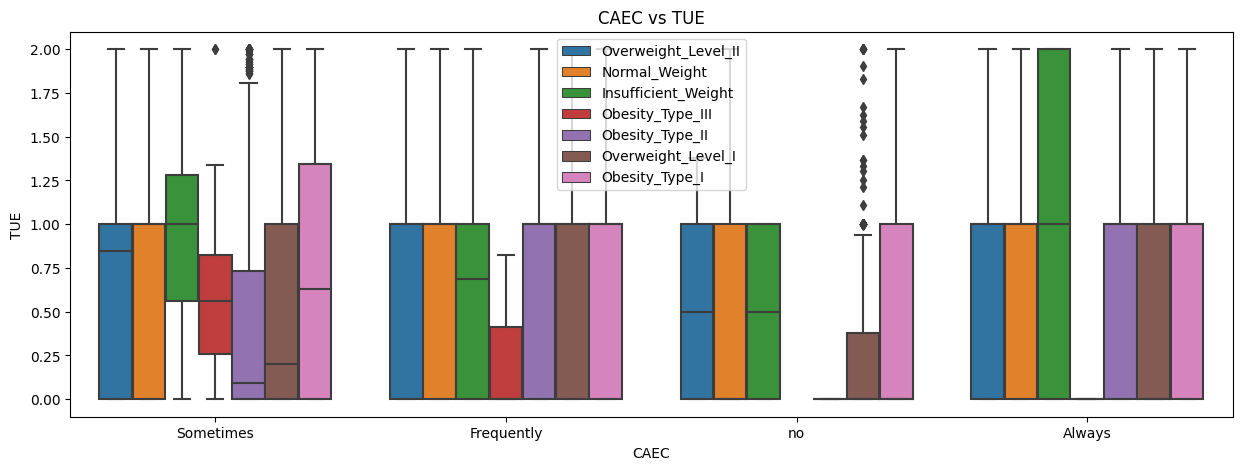

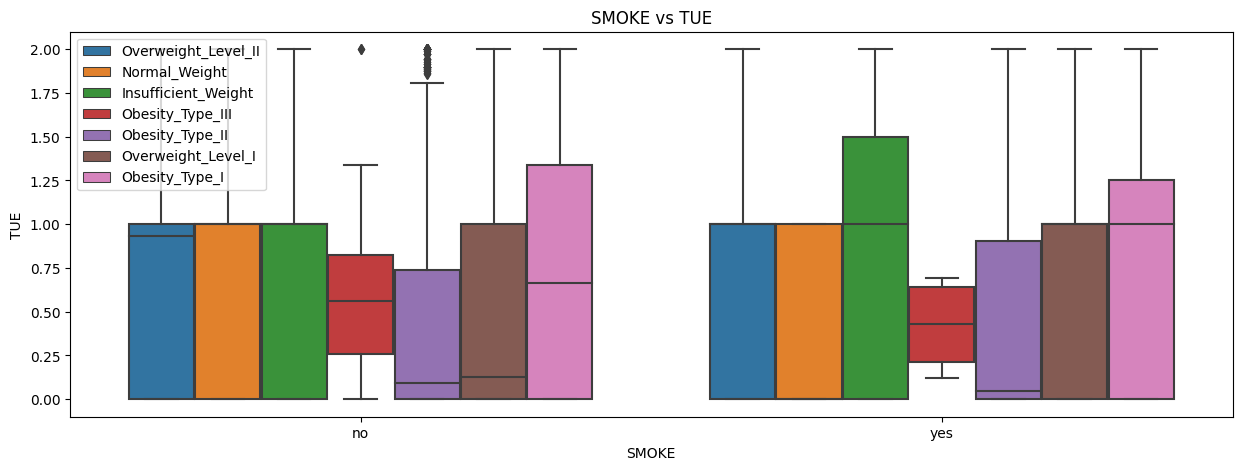

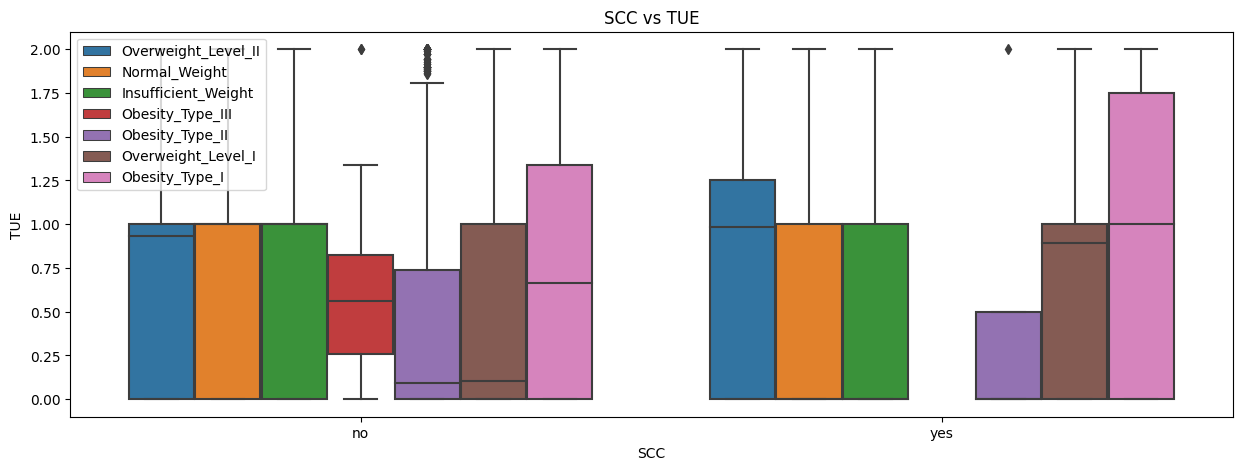

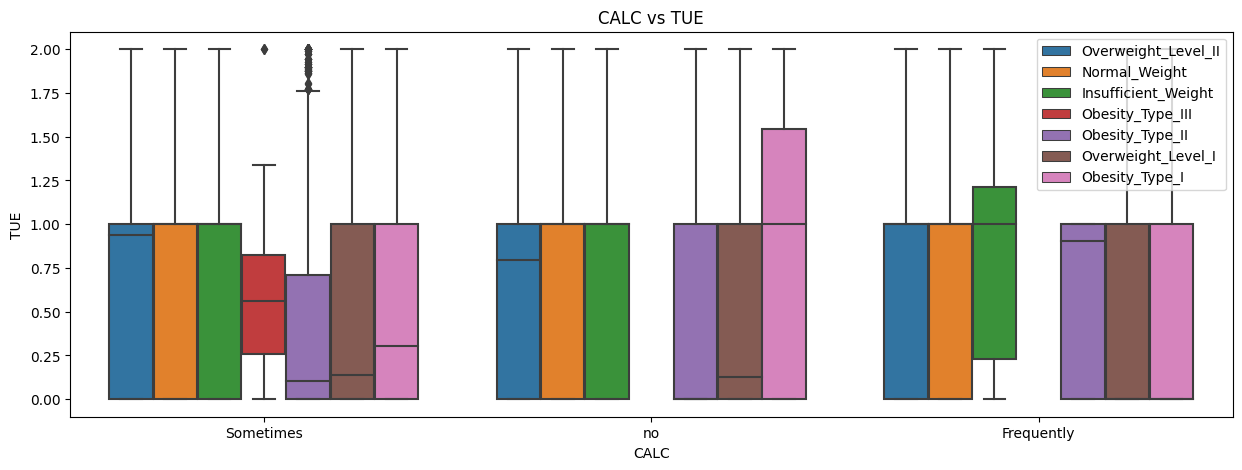

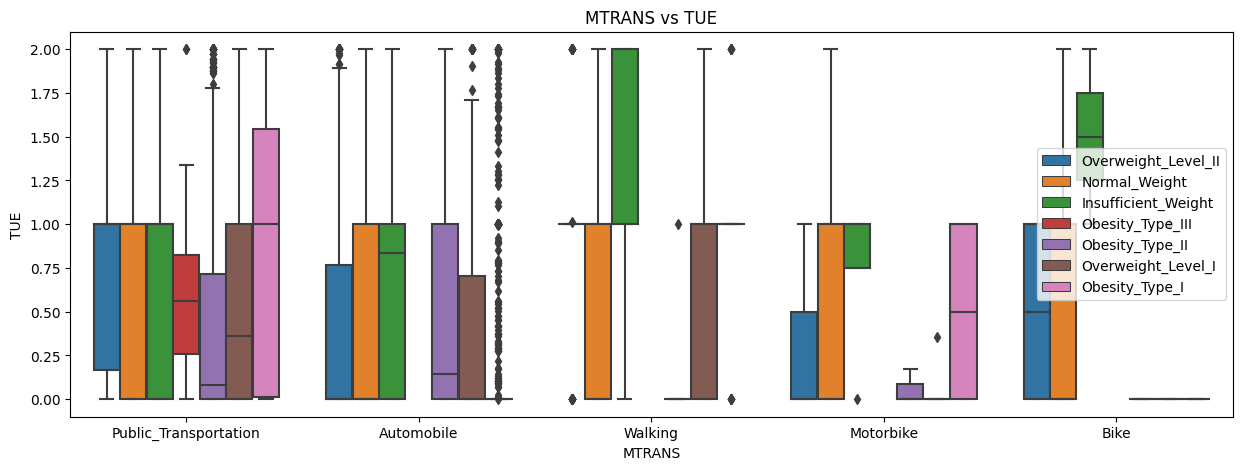

In [15]:
for num in num_cols:
    for col in cat_cols.drop(columns=['NObeyesdad']):
        plt.figure(figsize=(15, 5))
        s=sns.boxplot(df,x=col,y=num,hue='NObeyesdad').set(title= col+' vs '+num)
        #plt.axvline(df[num].mean(),color='g', label='Mean')
        #plt.axvline(df[num].median(),color='r', linestyle='--',label='Median')
        plt.legend()
        
   

In [16]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

## Observations:
1. No Nulls
1. There are seven classifications, in which the data is divided. The column to predict is NObeyesdad
1. There are two classes of NObeyesdad specific to Male and Female only.
1. Data Distribution is quite uniform, all classes have 2400-3200 representation apart of one class which has 4046 rows.
